# TransactionSentinel: Prote√ß√£o inteligente contra fraudes em transa√ß√µes de cart√£o de cr√©dito.


* Este notebook apresenta a constru√ß√£o de um estudo e um modelo de ML para detec√ß√£o de fraudes em dados financeiros fict√≠cios, seguindo a metodologia CRISP-DM.

* A abordagem ser√° estruturada em cinco das seis etapas da metodologia. A etapa de Deploy (Implanta√ß√£o) n√£o ser√° totalmente executada; no entanto, o modelo ser√° salvo como se estivesse pronto para produ√ß√£o.
    * Etapas: 

        * **Compreens√£o do Neg√≥cio** ‚Äì Defini√ß√£o do problema e dos objetivos do projeto.

        * **Compreens√£o dos Dados** ‚Äì Explora√ß√£o inicial para entender a estrutura e qualidade dos dados.

        * **Prepara√ß√£o dos Dados** ‚Äì Tratamento, limpeza e transforma√ß√£o dos dados para a modelagem.

        * **Modelagem** ‚Äì Aplica√ß√£o de algoritmos de machine learning para detectar padr√µes de fraude.

        * **Avalia√ß√£o** ‚Äì Medi√ß√£o do desempenho do modelo para garantir sua efic√°cia.

        * **Deploy** (Implanta√ß√£o) ‚Äì Integra√ß√£o do modelo em um ambiente operacional para uso real.

# 1.Compreens√£o do Neg√≥cio

* A detec√ß√£o de fraudes em transa√ß√µes financeiras √© um desafio essencial para institui√ß√µes banc√°rias e operadoras de cart√µes de cr√©dito. A identifica√ß√£o eficiente de fraudes reduz perdas financeiras e protege clientes contra atividades fraudulentas.

* Objetivo do Projeto:

    * 1- Desenvolver uma an√°lise explorat√≥ria que forne√ßa informa√ß√µes sobre o comportamento dos eventos fraudulentos e n√£o fraudulentos. 

    * 2-Desenvolver um modelo de Machine Learning capaz de identificar transa√ß√µes fraudulentas com alto desempenho, garantindo um equil√≠brio entre seguran√ßa e experi√™ncia do usu√°rio.



        * O modelo ser√° avaliado com as seguintes m√©tricas:

        * **Recall ‚â• 70% ** ‚Äì Para minimizar a quantidade de fraudes n√£o detectadas.

        * ** AUC-ROC ‚â• 85% ** ‚Äì Para garantir uma boa distin√ß√£o entre transa√ß√µes leg√≠timas e fraudulentas.

        * ** F1-score ‚â• 74% ** ‚Äì Para garantir um bom equil√≠brio entre precis√£o e recall, considerando a import√¢ncia de minimizar tanto os falsos positivos quanto os falsos negativos.

* Restri√ß√µes de Neg√≥cio

    Para atender a requisitos e garantir um modelo confi√°vel:

    * Imparcialidade e Preven√ß√£o de Discrimina√ß√£o: 
    
        O modelo n√£o deve apresentar tend√™ncias discriminat√≥rias baseadas em atributos como g√™nero, idade, localiza√ß√£o ou outros fatores socioecon√¥micos. Se esse tipo de varivel for interessante ao evento em estudo, deve se aplicar transformacoes nessas variaveis para que seja mitigada chance de vies descriminativo, ex: idade pode ser transformada em faixas etarias, localizacao pode se tornar distancia entre residencia do titular e local do estabelecimento (verificando distancia de tempo entre duas ou mais transacoes) para identificar algum padrao nas fraudes. 

 


    * Explicabilidade e Transpar√™ncia

        O modelo deve ser interpret√°vel tanto globalmente quanto localmente, garantindo que especialistas possam entender seus crit√©rios de decis√£o. T√©cnicas como SHAP (SHapley Additive Explanations) e LIME (Local Interpretable Model-agnostic Explanations) ser√£o aplicadas para fornecer insights sobre as previs√µes do modelo.

* Escopo da Implanta√ß√£o
    * O modelo final ser√° salvo para futuras implementa√ß√µes, mas a fase de Deploy n√£o ser√° completamente executada neste estudo.



# 2.Compreens√£o dos Dados

In [1]:
#Bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
from scipy.stats import chi2_contingency
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score,average_precision_score
import optuna
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef

from category_encoders import WOEEncoder

from scipy.stats import ttest_ind


# T√©cnicas de oversampling
from imblearn.over_sampling import (
    SMOTE,               # SMOTE padr√£o
    ADASYN,              # SMOTE adaptativo
    BorderlineSMOTE,     # SMOTE focado na fronteira
    KMeansSMOTE          # SMOTE com KMeans
)

# T√©cnicas combinadas com undersampling
from imblearn.combine import (
    SMOTEENN,            # SMOTE + Edited Nearest Neighbors
    SMOTETomek           # SMOTE + Tomek Links
)


from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN




* Importando e conhecendo os dados inicialmente

In [2]:
############para Kaggle

# Load the training dataset
#train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv') 

# Load the testing dataset
#test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Display the first few rows of both datasets
#print("First 5 rows of the training dataset:")
#print(train_data.head())

#print("\nFirst 5 rows of the testing dataset:")
#print(test_data.head())


# Carregando arquivos em parquet
df_orig_train = pd.read_parquet('C:/Users/jgeov/OneDrive/Documentos/GitHub/Ciencia_de_dados-1/Fraud_detection/fraudTrain.parquet')
df_orig_test = pd.read_parquet('C:/Users/jgeov/OneDrive/Documentos/GitHub/Ciencia_de_dados-1/Fraud_detection/fraudTest.parquet')



In [3]:
print('df_treino dimens√µes:', f"{df_orig_train.shape[0]:,}".replace(',', '.') + ' linhas, ' + f"{df_orig_train.shape[1]:,}".replace(',', '.') + ' colunas')
print('')
print('df_teste dimens√µes:', f"{df_orig_test.shape[0]:,}".replace(',', '.') + ' linhas, ' + f"{df_orig_test.shape[1]:,}".replace(',', '.') + ' colunas')
print('')
print('Total de observa√ß√µes:', f"{df_orig_train.shape[0] + df_orig_test.shape[0]:,}".replace(',', '.'))


df_treino dimens√µes: 1.296.675 linhas, 23 colunas

df_teste dimens√µes: 555.719 linhas, 23 colunas

Total de observa√ß√µes: 1.852.394


In [4]:
# Se voc√™ quiser combin√°-los (por exemplo, por concatena√ß√£o)
df_total = pd.concat([df_orig_train, df_orig_test], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame combinado

#configs para nao quebrar linhas no print do  df
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.max_columns', None)


df_total.head(3)


Unnamed: 0 trans_date_trans_time            cc_num                         merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0           0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1           1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2           2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0

In [5]:
#A coluna "Unnamed: 0" representa apenas a contagem dos datasets de treino e teste. Ao concaten√°-los para a compreens√£o dos dados, essa coluna foi duplicada.
#Como se trata apenas de um √≠ndice sem valor informativo para a an√°lise, e n√£o ser√° utilizada em nenhuma etapa do estudo, ela ser√° removida j√° nesta fase.
df_total.sort_values(by="Unnamed: 0", ascending=True).head(5)


Unnamed: 0 trans_date_trans_time            cc_num                         merchant       category     amt      first      last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
1296675           0   2020-06-21 12:14:25  2291163933867244            fraud_Kirlin and Sons  personal_care    2.86       Jeff   Elliott      M             351 Darlene Green        Columbia    SC  29209  33.9659  -80.9355    333497                Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714         0
0                 0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer     Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1296676           1   2020-06-21 12:14:33  3573030041201292             fraud_Sporer-Keebler  personal_care   29.84     Joanne  Williams      F              3638 Marsh Union         Altonah    UT  84002  40.3207 -110.4360       302             Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431         0
1                 1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie      Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2                 2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge  entertainment  220.11     Edward   Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0

In [6]:
#removendo 
df_total = df_total.drop(columns=["Unnamed: 0"])

#resetando indice (morrer de certeza, depois da concatenacao pode ter duplicado tambem em algum ponto)
df_total = df_total.reset_index(drop=True)

#ordenando os dados pelo indice
df_total = df_total.sort_index(ascending=True)


df_total.head(5)


trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071         0
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459         0

In [7]:
print('df_total dimesoes:',df_total.shape) #comparacao com soma dos dfs de treino e teste (soma bate) ok

df_total dimesoes: (1852394, 22)


In [8]:
#cnhecendo as colunas e tipos de dados
print(df_total.columns)
print("")
print(df_total.dtypes)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud              

In [9]:
#checando os valores null em cada variavel 

#checando se h√° valores nulos 
df_total.isnull().sum()  
#valores nulos nao encontrados 

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
#contando a quantidade de zeros em cada coluna para verificar se elas tem 
# informacao suficiente para entrar no modelo futuramente

for col in df_total.columns:
    zero_count = (df_total[col] == 0).sum()
    print("")
    print(f" '{col}': {zero_count} valores zero")

    #nenhuma variavel contem valores zerados, a nao ser a variavel alvo,
    #  e aqui ja podemos ver que se trata de um estudo de enventos raros realmente. 




 'trans_date_trans_time': 0 valores zero

 'cc_num': 0 valores zero

 'merchant': 0 valores zero

 'category': 0 valores zero

 'amt': 0 valores zero

 'first': 0 valores zero

 'last': 0 valores zero

 'gender': 0 valores zero

 'street': 0 valores zero

 'city': 0 valores zero

 'state': 0 valores zero

 'zip': 0 valores zero

 'lat': 0 valores zero

 'long': 0 valores zero

 'city_pop': 0 valores zero

 'job': 0 valores zero

 'dob': 0 valores zero

 'trans_num': 0 valores zero

 'unix_time': 0 valores zero

 'merch_lat': 0 valores zero

 'merch_long': 0 valores zero

 'is_fraud': 1842743 valores zero


# 2.1 Analisando e Descrevendo: An√°lise Explorat√≥ria (EDA)


* Dicionario de dados e acoes previamente ja determinadas de acordo com a natureza da varivel. 
* O oficial nao foi divulgado, entao com base no nome das variaveis foi determinado: 



| **Nome da Vari√°vel**        | **Descri√ß√£o**                                                                 | **Transforma√ß√£o Necess√°ria** |
|-----------------------------|-------------------------------------------------------------------------------|-----------------------------|
| **trans_date_trans_time**    | Data e hora da transa√ß√£o (`yyyy-mm-dd hh:mm:ss`).                            | Extrair hora, dia da semana, m√™s, periodo da transacao etc.|
| **cc_num** | N√∫mero do cart√£o de cr√©dito utilizado na transa√ß√£o.<br> Pode ser √∫til para identificar padr√µes de uso suspeitos e anomalias.<br> Contudo, √© um dado sens√≠vel e deve ser tratado para garantir conformidade com normas de privacidade. |  Extrair padr√µes relevantes, como:<br>  - Extrair primeiros d√≠gitos (BIN) que identificam o banco das transa√ß√µes <br>  - Contagem de transa√ß√µes por cart√£o em um per√≠odo de tempo. <br> - Contagem de vezes que o cartao foi usado|
| **merchant**                 | Nome do comerciante.                                                          |  |
| **category**                 | Categoria da transa√ß√£o (`misc_net`, `grocery_pos`, etc.).                     |  |
| **amt**                      | Valor da transa√ß√£o.                                                           |  |
| **first**                    | Primeiro nome do titular.                                                     | Remover (Irrelevante). |
| **last**                     | Sobrenome do titular.                                                         | Remover (Irrelevante). |
| **gender**                   | G√™nero do titular (`F` ou `M`).                                               | Remover (Poss√≠vel vi√©s discriminat√≥rio).|
| **street**                   | Endere√ßo do titular.                                                          | Remover (Irrelevante). |
| **city**                     | Cidade do titular.                                                            | Remover (J√° h√° `lat` e `long`). |
| **state**                    | Estado do titular.                                                            | Remover (J√° h√° `lat` e `long`). |
| **zip**                      | C√≥digo postal (CEP).                                                          | Remover (J√° h√° `lat` e `long`). |
| **lat**                      | Latitude da localiza√ß√£o do titular.                                           |  |
| **long**                     | Longitude da localiza√ß√£o do titular.                                          |  |
| **city_pop**                 | Popula√ß√£o da cidade do titular.                                               |  |
| **job**                      | Profiss√£o do titular.                                                         |  |
| **dob**                      | Data de nascimento (`yyyy-mm-dd`).                                            | Converter para idade. |
| **trans_num**                | Identificador √∫nico da transa√ß√£o.                                             | Remover (Irrelevante). |
| **unix_time**                | Timestamp Unix (segundos desde 1970).                                         | Remover - reduntande ja temos trans_date_trans_time  |
| **merch_lat**                | Latitude da localiza√ß√£o do comerciante.                                       |  |
| **merch_long**               | Longitude da localiza√ß√£o do comerciante.                                      |  |
| **is_fraud**                 | Indicador de fraude (`1` = fraudulenta, `0` = leg√≠tima).                      | **Vari√°vel alvo** |



In [11]:
print(df_total.dtypes)

df_anl_num = df_total[['amt','city_pop','is_fraud']] #df so de numericas elegiveis para analise (APENAS ANALISE)

pd.options.display.float_format = '{:.2f}'.format  # config 2 casas decimais para configurar o describe
df_anl_num.describe()

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


amt   city_pop   is_fraud
count 1852394.00 1852394.00 1852394.00
mean       70.06   88643.67       0.01
std       159.25  301487.62       0.07
min         1.00      23.00       0.00
25%         9.64     741.00       0.00
50%        47.45    2443.00       0.00
75%        83.10   20328.00       0.00
max     28948.90 2906700.00       1.00

* Verificando relacao entre a variavel alvo e as variaveis explicativas numericas
    * sem muita correlacao inicialmente 

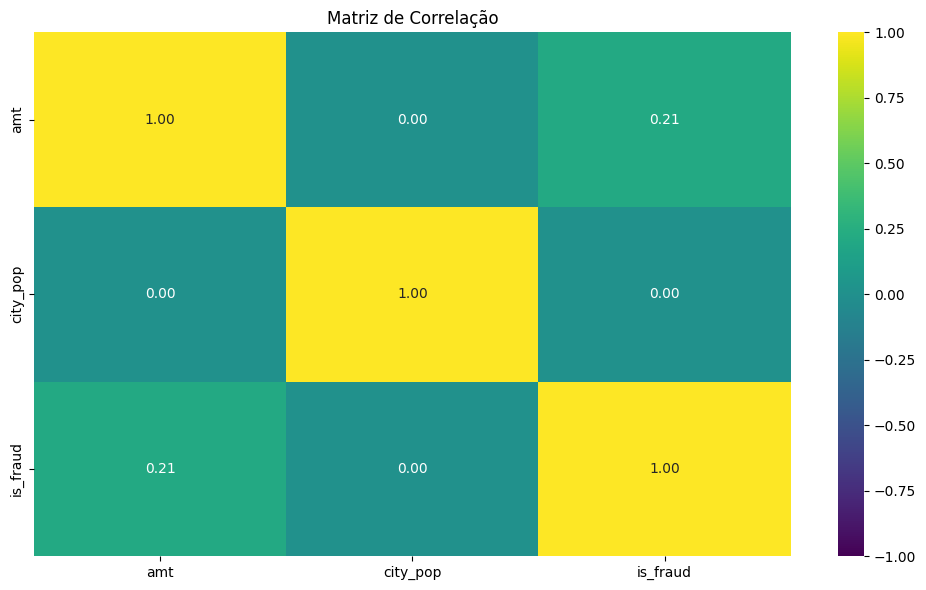

In [12]:
# Suprimir todos os warnings
warnings.filterwarnings("ignore")

# Criar a figura com 1 subgr√°fico (apenas o gr√°fico de correla√ß√£o)
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# 1. Gr√°fico de Correla√ß√£o (Matriz de Correla√ß√£o)
sns.heatmap(df_anl_num.corr(), annot=True, cmap="viridis", fmt=".2f", ax=axes, vmin=-1, vmax=1)
axes.set_title('Matriz de Correla√ß√£o')

# Ajustar o layout
plt.tight_layout()
plt.show()


* Verificando relacao entre a variavel alvo e as variaveis explicativas categoricas ("frequencias")
    * Aqui ja podemos ver como se trata de um evento raro; 
    * as cateogrias de compras (variavel category) com "_net" sao de transacoes de compra online, as "_pos" sao trasacoes de compra presenciais. Elas detem a maioria das fraudes dentre as categorias, o que √© naturalmente compreensivel. 

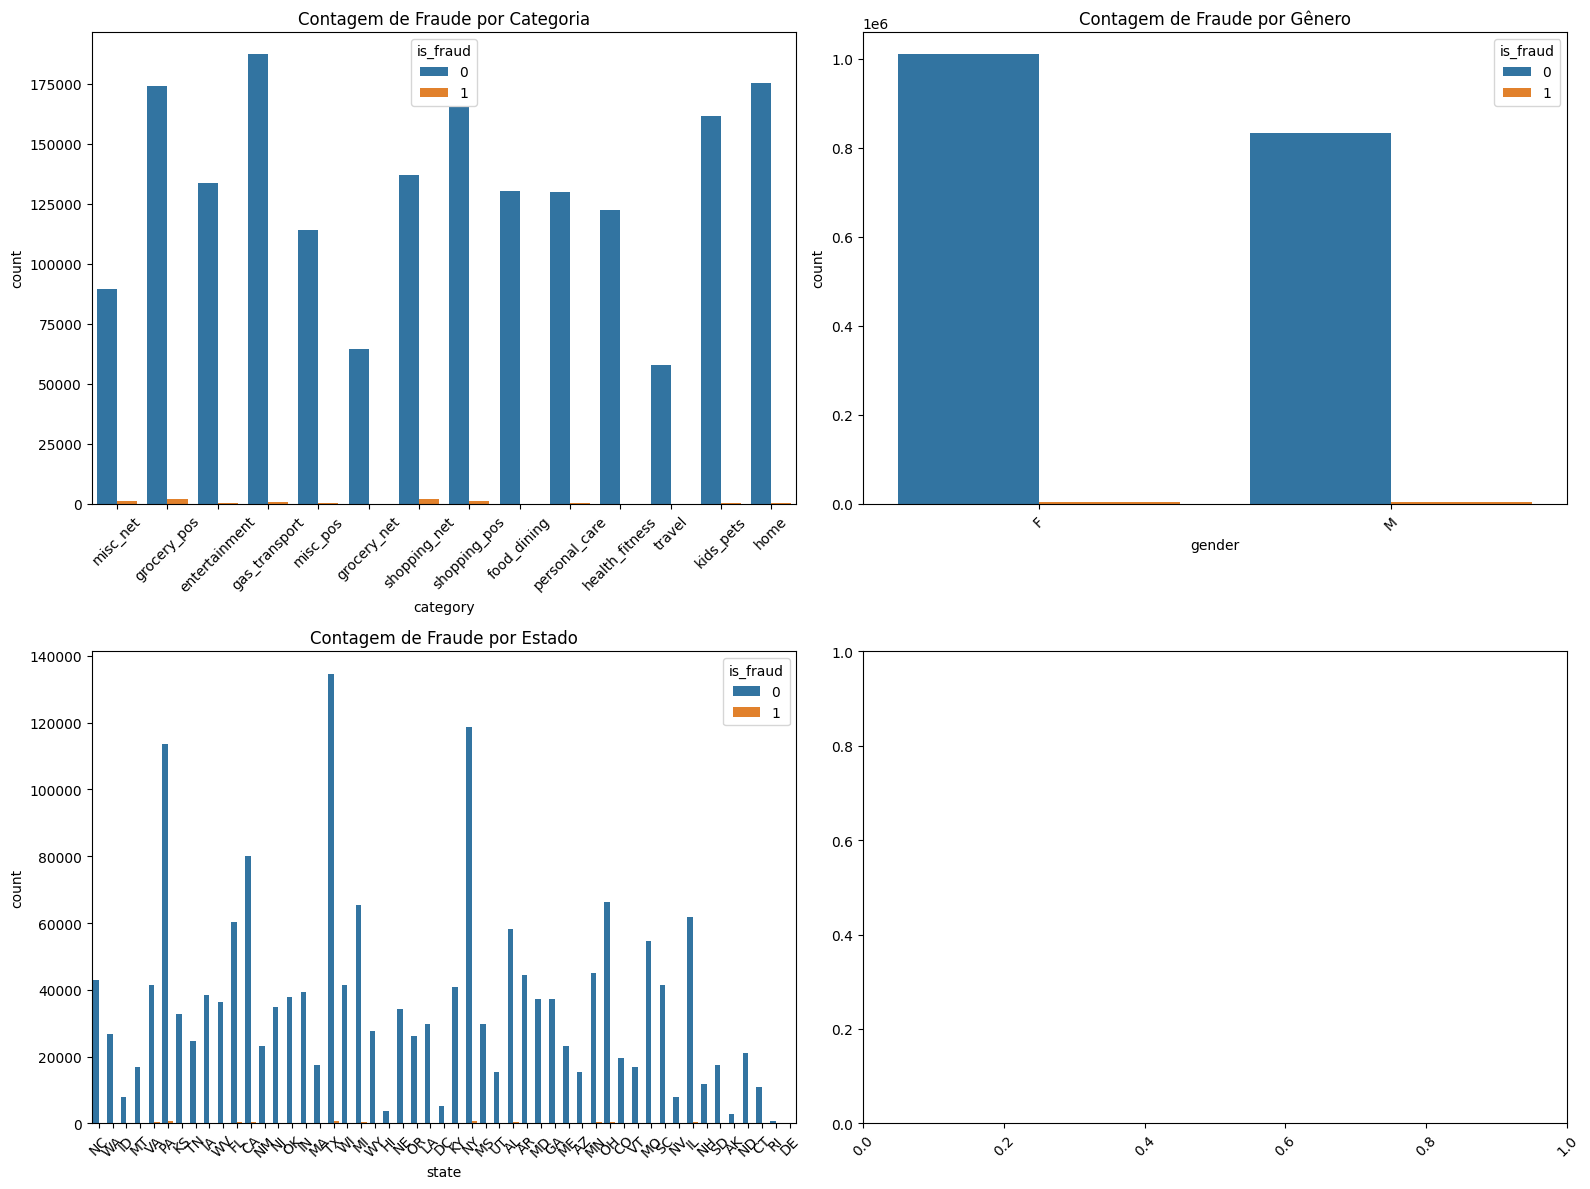

In [13]:
df_anl_cat = df_total[['category','gender','state','is_fraud']] #df so de categoricas elegiveis para analise (APENAS ANALISE)


# Criar a figura com 3 subgr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gr√°fico de contagem para a vari√°vel 'category'
sns.countplot(data=df_anl_cat, x='category', hue='is_fraud', ax=axes[0, 0])
axes[0, 0].set_title('Contagem de Fraude por Categoria')

# 2. Gr√°fico de contagem para a vari√°vel 'gender'
sns.countplot(data=df_anl_cat, x='gender', hue='is_fraud', ax=axes[0, 1])
axes[0, 1].set_title('Contagem de Fraude por G√™nero')

# 3. Gr√°fico de contagem para a vari√°vel 'state'
sns.countplot(data=df_anl_cat, x='state', hue='is_fraud', ax=axes[1, 0])
axes[1, 0].set_title('Contagem de Fraude por Estado')

# Aplicar rota√ß√£o de 45 graus em todos os r√≥tulos do eixo x
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotaciona os r√≥tulos do eixo x para 45 graus

# Ajustar layout
plt.tight_layout()

# Exibir o gr√°fico
plt.show()



* Verificando a relacao entre as variaveis numericas explicativas (sem variavel alvo)
    * Vemos um agrupamento em valores pequenos para ambas variaveis;
    * embora a variavel alvo esteja na legenda, √© meramente para vermos onde se encontrar as observacoes de fraude entre as variaveis, nao e muito conclusivo mas da uma ideia de onde se "agrupam" em termos de valores

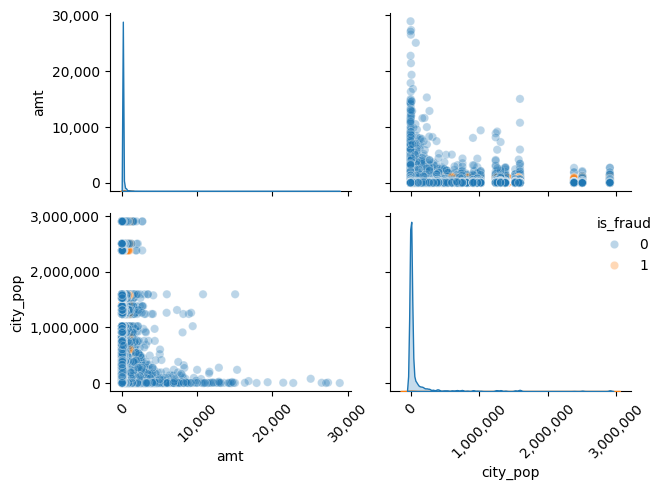

In [14]:
# Cria o pairplot
g = sns.pairplot(
    df_anl_num, 
    hue='is_fraud',
    diag_kind='kde',
    height=2.5,
    aspect=1.2,
    plot_kws={'alpha': 0.3}
)

# Formata os eixos 
for ax in g.axes.flatten():
    # Formata√ß√£o(sem nota√ß√£o cient√≠fica automatica)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.tick_params(axis='x', rotation=45) # eixo x em 45 graus

    plt.tight_layout()

plt.show()

* Verificando a relacao entre as variaveis explicativas categoricas (sem variavel alvo)
    * Aqui verificamos se ha associacao estatistica entre as variveis cetegoricas (sem a alvo) pelo teste de Qui2
    * Verificamos e classificamos em baixa media e alta a forca das associaicoes entre as variaveis categoricas, e plotamos os resultados pelo heatmap de V de Cramer tambem. 

Teste Qui-Quadrado entre category e gender:
Qui¬≤=5407.24, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.05 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre category e state:
Qui¬≤=9421.63, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.02 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre gender e category:
Qui¬≤=5407.24, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.05 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre gender e state:
Qui¬≤=121239.38, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.26 (M√©dia For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre state e category:
Qui¬≤=9421.63, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.02 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre state e gender:
Qui¬≤=121239.38, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.

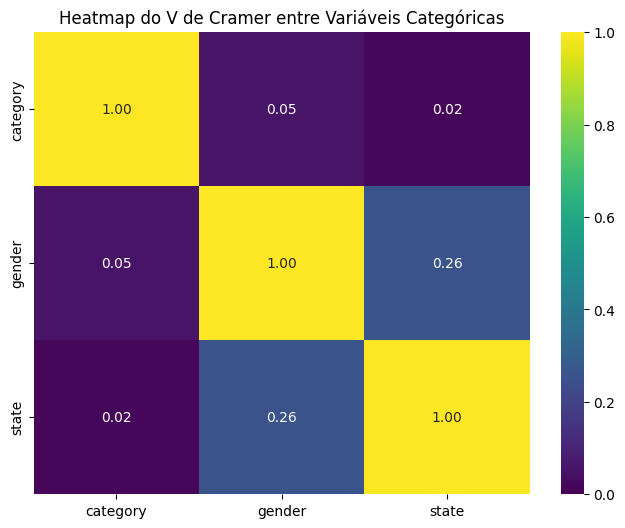

In [15]:
# df_ de categoricas sem a variavel alvo
df_cat = df_anl_cat[['category', 'gender', 'state']]

def cramers_v(x, y):
    """Calcula o V de Cramer entre duas vari√°veis categ√≥ricas."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Fun√ß√£o para categorizar a for√ßa do V de Cramer
def categorize_cramers_v(value):
    if value < 0.10:
        return "Baixa For√ßa de"
    elif value < 0.30:
        return "M√©dia For√ßa de"
    else:
        return "Alta For√ßa de"

# Inicializa um DataFrame para armazenar os resultados
results = pd.DataFrame(index=df_cat.columns, columns=df_cat.columns)

for col1 in df_cat.columns:
    for col2 in df_cat.columns:
        if col1 == col2:
            results.loc[col1, col2] = 1.0  # Correla√ß√£o perfeita com ela mesma
        else:
            table = pd.crosstab(df_cat[col1], df_cat[col2])
            chi2, p, _, _ = chi2_contingency(table)
            v_cramer = cramers_v(df_cat[col1], df_cat[col2])

            # Interpreta√ß√£o do p-valor
            significance = "h√° evid√™ncia de associa√ß√£o" if p < 0.05 else "n√£o h√° evid√™ncia de associa√ß√£o"
            
            # Classifica√ß√£o da for√ßa do V de Cramer
            strength = categorize_cramers_v(v_cramer)

            print(f'Teste Qui-Quadrado entre {col1} e {col2}:')
            print(f'Qui¬≤={chi2:.2f}, p-valor={p:.4f} ({"menor" if p < 0.05 else "maior"} que 0.05, {significance}).')
            print(f'V de Cramer={v_cramer:.2f} ({strength} associa√ß√£o)\n')

            results.loc[col1, col2] = v_cramer


# Converte os valores para float
results = results.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap='viridis', fmt='.2f', vmin=0, vmax=1)
plt.title('Heatmap do V de Cramer entre Vari√°veis Categ√≥ricas')
plt.show()




* Aqui evidencia-se o desbalance das classes da variavel alvo, trata-se de um evento raro, conforme ja haviam indicios. 

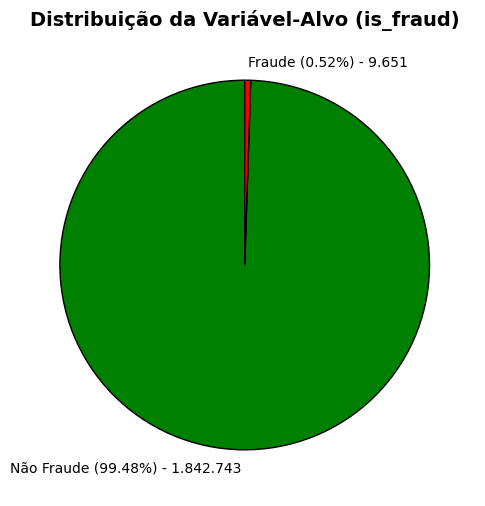

In [16]:
# Contar a quantidade de cada classe
fraud_counts = df_total["is_fraud"].value_counts()

# Criar o gr√°fico de pizza
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(
    fraud_counts, labels=["N√£o Fraude", "Fraude"], 
    colors=["green", "red"], startangle=90, wedgeprops={"edgecolor": "black"}
)

# Adicionar os percentuais e contagens formatadas
for i, (text, pct) in enumerate(zip(texts, fraud_counts / fraud_counts.sum() * 100)):
    count_formatted = f"{fraud_counts.iloc[i]:,}".replace(",", ".")
    text.set_text(f"{text.get_text()} ({pct:.2f}%) - {count_formatted}")

# Adicionar t√≠tulo
plt.title("Distribui√ß√£o da Vari√°vel-Alvo (is_fraud)", fontsize=14, fontweight="bold")

# Mostrar o gr√°fico
plt.show()


* Verificando localizacao das transacoes e dos titulares dos cartoes 
    * Aqui foi dado foco nos maiores ofensores de fraudes: as variaveis de compra presencial "_pos" e online "_net" pois apresentaram grande parte das fraudes 
    * Ha maior concentracao de transacoes do lado da Costa Leste 
    * Existem transacoes no Havai, Canad√° e no Alasca, mas sao em pequenos volumes, ainda assim sao estranhas(principalemnte Alasca). 

In [17]:
# Filtrar apenas transa√ß√µes fraudulentas E que sejam online (_net)
df_fraude_net = df_total[(df_total["is_fraud"] == 1) & (df_total["category"].str.contains("_net", na=False))]

# Criar um DataFrame com as coordenadas SOMENTE de fraudes online
df_mapa = pd.DataFrame({
    "Latitude": list(df_fraude_net["lat"]) + list(df_fraude_net["merch_lat"]),
    "Longitude": list(df_fraude_net["long"]) + list(df_fraude_net["merch_long"]),
    "Tipo": ["Titular"] * len(df_fraude_net) + ["Estabelecimento"] * len(df_fraude_net)
})

# Amostrar 50% para evitar sobrecarga (ajuste conforme volume de dados)
df_mapa_sample = df_mapa.sample(frac=0.5, random_state=42) if len(df_mapa) > 1000 else df_mapa

# Criar o mapa com os pontos das fraudes online
fig = px.scatter_mapbox(df_mapa_sample, lat="Latitude", lon="Longitude",
                        color="Tipo",  
                        mapbox_style="carto-positron",
                        zoom=3, 
                        color_discrete_map={"Titular": "orange", "Estabelecimento": "blue"}  # Define cores personalizadas
                        )

# Ajustar layout com margem superior maior para exibir o t√≠tulo
fig.update_layout(
    width=1700,  
    height=700,  
    margin={"r":0, "t":50, "b":0, "l":0},
    title={
        "text": "AMOSTRA de Distribui√ß√£o das Transa√ß√µes Fraudulentas ONLINE por Localiza√ß√£o do Titular e Estabelecimento",
        "x": 0.5,  # Centraliza o t√≠tulo
        "xanchor": "center",  # Garante alinhamento centralizado
        "yanchor": "top",
        "font": {"size": 20, "family": "Arial Black"}  # Aumenta o tamanho e deixa em negrito
    }
)


fig.show()


In [18]:
# Filtrar apenas transa√ß√µes fraudulentas E que sejam presenciais (_pos)
df_fraude_net = df_total[(df_total["is_fraud"] == 1) & (df_total["category"].str.contains("_pos", na=False))]

# Criar um DataFrame com as coordenadas SOMENTE de fraudes presenciais
df_mapa = pd.DataFrame({
    "Latitude": list(df_fraude_net["lat"]) + list(df_fraude_net["merch_lat"]),
    "Longitude": list(df_fraude_net["long"]) + list(df_fraude_net["merch_long"]),
    "Tipo": ["Titular"] * len(df_fraude_net) + ["Estabelecimento"] * len(df_fraude_net)
})

# Amostrar 50% para evitar sobrecarga (ajuste conforme volume de dados)
df_mapa_sample = df_mapa.sample(frac=0.5, random_state=42) if len(df_mapa) > 1000 else df_mapa

# Criar o mapa com os pontos das fraudes presenciais, definindo cores espec√≠ficas
fig = px.scatter_mapbox(df_mapa_sample, lat="Latitude", lon="Longitude",
                        color="Tipo",  
                        mapbox_style="carto-positron",
                        zoom=3,
                        color_discrete_map={"Titular": "orange", "Estabelecimento": "blue"}  # Define cores personalizadas
)

# Ajustar layout
fig.update_layout(
    width=1700,  
    height=700,  
    margin={"r":0, "t":50, "b":0, "l":0},
    title={
        "text": "AMOSTRA de Distribui√ß√£o das Transa√ß√µes Fraudulentas PRESENCIAIS por Localiza√ß√£o do Titular e Estabelecimento",
        "x": 0.5,  
        "xanchor": "center",  
        "yanchor": "top",
        "font": {"size": 20, "family": "Arial Black"}  
    }
)

fig.show()


# 3 Prepara√ß√£o dos Dados: Feature Engineering


* estudar a criacao de uma variavel que identifica a distancia (se e anormal) entre duas transacoes, acho que usar o racional da variavel de contagem de vezes que o cartao foi usado na ultima hora (trans_count_last_hour) 
ex: uma transacao feita presencialemnte seguida de outra presencialmente em locais muito distantes em 1 hora (ou outro periodo se for o caso) podem indicar uma possivel fraude

* criando variavel de distancia em Km entre estabeleciemnto e titular do cartao para compras presencias. 
    * Foi usada a dist√¢ncia entre os pontos pela f√≥rmula de Haversine, pois ela considera a curvatura da Terra e retorna a dist√¢ncia real em km, diferentemente da Euclidiana, que assume um espa√ßo plano (2D) e n√£o converte diretamente em quil√¥metros.

In [19]:
# Fun√ß√£o para remover vari√°veis desnecessarias
def Limpa_df(df, colunas_para_excluir):
    df = df.drop(columns=colunas_para_excluir, errors='ignore')  # ignora colunas que n√£o existem
    #df = df.dropna()  # remove linhas com valores ausentes
    return df




def mover_target_para_final(df, target):
    """
    Move a variavel alvo para o final do df

    Isso nao interfere em resultados, e para manter o padrao de legibilidade e facilitar a visualizacao da target
    """
    colunas = [col for col in df.columns if col != target] + [target]
    return df[colunas]



In [20]:
# criando variavel de distancia em Km entre estabeleciemnto e titular do cartao para compras presencias (nao faz sentido para compras online que podem e muito provavlemente sera, bem distantes)
#essa variavel permitira entender se a compra presencial foi muito distante do local do titular do cartao, podendo indicar possivel fraude, isso sera estudado


# Definindo as categorias presenciais
categorias_presenciais = [
    "misc_pos", "grocery_pos", "gas_transport", 
    "shopping_pos", "personal_care", "health_fitness"
]


# Fun√ß√£o para calcular dist√¢ncia Haversine em KM
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio m√©dio da Terra em km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Aplicar linha a linha
df_total["distancia_km"] = df_total.apply(
    lambda row: haversine(row["lat"], row["long"], row["merch_lat"], row["merch_long"])
    if row["category"] in categorias_presenciais else np.nan,
    axis=1
)

#trata NAN 
df_total["distancia_km"] = df_total["distancia_km"].fillna(0)


df_total.head(10)





trans_date_trans_time            cc_num                            merchant       category    amt      first      last gender                          street            city state    zip   lat    long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  distancia_km
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97   Jennifer     Banks      F                  561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018      36.01      -82.05         0          0.00
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23  Stephanie      Gill      F    43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044      49.16     -118.19         0         30.21
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11     Edward   Sanchez      M        594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051      43.15     -112.15         0          0.00
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00     Jeremy     White      M     9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076      47.03     -112.56         0         95.67
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      Tyler    Garcia      M                408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186      38.67      -78.63         0         77.56
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman  gas_transport  94.63   Jennifer    Conner      F               4655 David Island          Dublin    PA  18917 40.38  -75.20      2158                  Transport planner  1961-06-19  189a841a0a8ba03058526bcfe566aab5  1325376248      40.65      -76.15         0         85.92
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort    grocery_net  44.54     Kelsey  Richards      F     889 Sarah Station Suite 624         Holcomb    KS  67851 37.99 -100.99      2691                    Arboriculturist  1993-08-16  83ec1cc84142af6e2acf10c44949e720  1325376282      37.16     -100.15         0          0.00
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins  gas_transport  71.65     Steven  Williams      M       231 Flores Pass Suite 720        Edinburg    VA  22824 38.84  -78.60      6018               Designer, multimedia  1947-08-21  6d294ed2cc447d2c71c7171a3d54967c  1325376308      38.95      -78.54         0         12.77
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd       misc_pos   4.27    Heather     Chase      F     6888 Hicks Stream Suite 954           Manor    PA  15665 40.34  -79.66      1472          Public affairs consultant  1941-03-07  fc28024ce480f8ef21a32d64c93a29f5  1325376318      40.35      -79.96         0         25.27
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche    grocery_pos 198.39    Melissa   Aguilar      F  21326 Taylor Squares Suite 708     Clarksville    TN  37040 36.52  -87.35    151785                        Pathologist  1974-03-28  3b9014ea8fb80bd65de0b1463b00b00e  1325376361      37.18      -87.49         0         74.08

* Testando a distancia entre as variaveis em um mapa 
    * sugiro conferir em https://www.movable-type.co.uk/scripts/latlong.html tambem, para ter cereteza da logica de Haversine implantada (comparar os resultados da variavel de distancia pegando as coord e jogando la)

In [21]:
n_observacao=3 #deve ser observacao presencial as demais nao teram valor para essa variavel
# Selecionar a primeira observa√ß√£o do df_total
obs = df_total[df_total["cc_num"] == df_total["cc_num"].iloc[n_observacao]].iloc[0]

# Extrair coordenadas
lat1, lon1 = obs['lat'], obs['long']
lat2, lon2 = obs['merch_lat'], obs['merch_long']
distancia_km = obs['distancia_km']

# Criar DataFrame com os dois pontos
df_pontos = pd.DataFrame({
    'Nome': ['Titular', 'Estabelecimento'],
    'Latitude': [lat1, lat2],
    'Longitude': [lon1, lon2]
})

# Criar figura
fig = go.Figure()

# Adicionar os dois pontos
fig.add_trace(go.Scattermapbox(
    lat=df_pontos['Latitude'],
    lon=df_pontos['Longitude'],
    mode='markers+text',
    text=df_pontos['Nome'],
    marker=dict(size=12, color=['purple', 'blue']),
    textposition="top center",
    name='Pontos'
))

# Linha entre os pontos
fig.add_trace(go.Scattermapbox(
    lat=[lat1, lat2],
    lon=[lon1, lon2],
    mode='lines',
    line=dict(width=2, color='gray'),
    name='Dist√¢ncia reta'
))

# Ponto m√©dio com r√≥tulo da dist√¢ncia
if pd.notna(distancia_km):
    lat_meio = (lat1 + lat2) / 2
    lon_meio = (lon1 + lon2) / 2
    fig.add_trace(go.Scattermapbox(
        lat=[lat_meio],
        lon=[lon_meio],
        mode='markers+text',
        text=[f'{round(distancia_km, 2)} km'],
        marker=dict(size=1, color='white'),  # marcador min√∫sculo e invis√≠vel
        textfont=dict(size=14, color='black'),
        textposition="top center",
        showlegend=False
    ))

# Layout do mapa
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": (lat1 + lat2) / 2, "lon": (lon1 + lon2) / 2},
    margin={"r":0,"t":0,"l":0,"b":0},
    height=500,
    title=f"Mapa: {obs['cc_num']} | Categoria: {obs['category']}"
)

fig.show()


* Verificando as quantidades por "categoria" (criada so pra analise, nao e uma feature) de distancias, para identificar concentracoes em distancias maiores para transacoes presenciais. 
    * Distancias muito grandes para compras presenciais e um estabelecimento "pode" pontar um padrao de fraudes;
    * Ha maior concentracao em fraudes presenciais de 50 a 100 km de distancia entre endereco do titular e o estabelecimento, e uma distancia aceitavel, pode significar viagens, trabalho ... Nada muito discrepante. 
    * Ha poucas variaveis com km acima de 120, nao parecem ser indcios de padrao de fraude. 

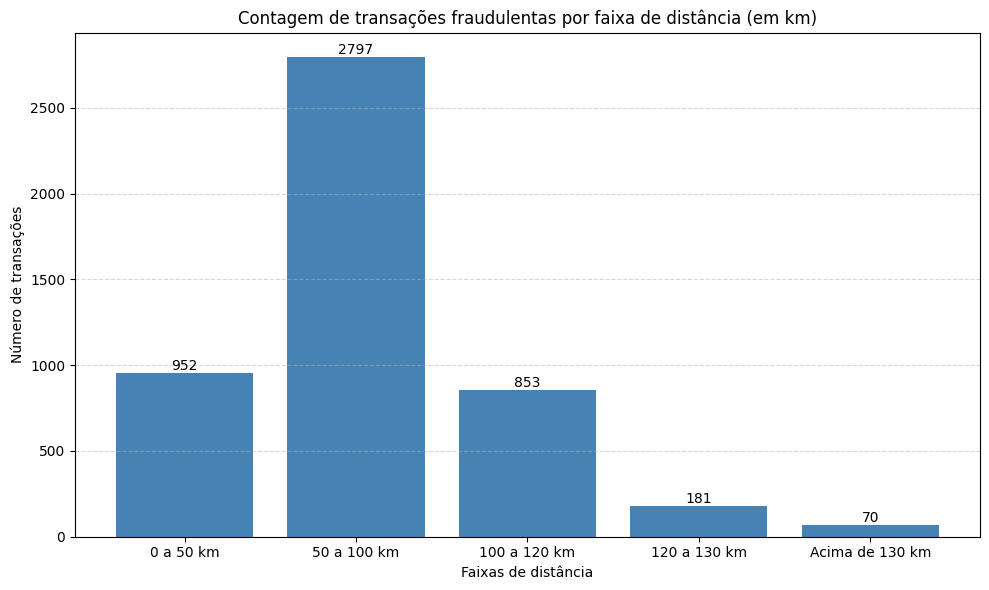

Total de transa√ß√µes fraudulentas com dist√¢ncia >= 0 km: 9651


In [22]:
import matplotlib.pyplot as plt

# Contagens por faixa
faixas = ['0 a 50 km', '50 a 100 km', '100 a 120 km', '120 a 130 km', 'Acima de 130 km']
contagens = [
    ((df_total["distancia_km"] > 0) & (df_total["distancia_km"] <= 50) & (df_total["is_fraud"] == 1)).sum(),
    ((df_total["distancia_km"] > 50) & (df_total["distancia_km"] <= 100) & (df_total["is_fraud"] == 1)).sum(),
    ((df_total["distancia_km"] > 100) & (df_total["distancia_km"] <= 120) & (df_total["is_fraud"] == 1)).sum(),
    ((df_total["distancia_km"] > 120) & (df_total["distancia_km"] <= 130) & (df_total["is_fraud"] == 1)).sum(),
    ((df_total["distancia_km"] > 130) & (df_total["is_fraud"] == 1)).sum()
]

# Plotando o gr√°fico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(faixas, contagens, color='steelblue')

# Adicionando r√≥tulos com as contagens
for bar, count in zip(bars, contagens):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=10)

plt.title('Contagem de transa√ß√µes fraudulentas por faixa de dist√¢ncia (em km)')
plt.ylabel('N√∫mero de transa√ß√µes')
plt.xlabel('Faixas de dist√¢ncia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


print("Total de transa√ß√µes fraudulentas com dist√¢ncia >= 0 km:", 
      ((df_total["is_fraud"] == 1) & (df_total["distancia_km"] >= 0)).sum())




In [23]:
# Copia a coluna de trans_num para preserva-la comom coluna de dados no df 
df_total["trans_num_copy"] = df_total["trans_num"]

# Define o √≠ndice como trans_num 
df_total.set_index("trans_num_copy", inplace=True)


In [24]:
df_total.index.name = None #tira o cabecalho da variavel trans_num da primeira linha do df

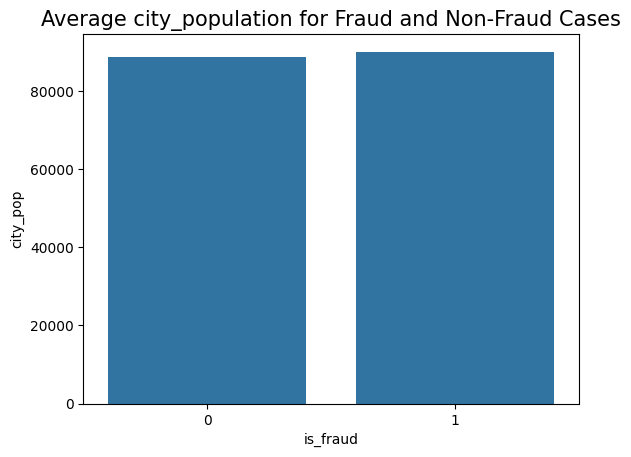

T-test: t-statistic = 0.443, p-value = 0.658, p-value<0.05? False


In [25]:
sns.barplot(data=df_total,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df_total[df_total['is_fraud'] == 1]['city_pop']
non_fraud_population = df_total[df_total['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')



In [26]:
#Como aceitamos a hip√≥tese nula(p-val > 0.05), conclu√≠mos que n√£o h√° diferen√ßa significativa entre as m√©dias.
#Conclu√≠mos tamb√©m que city_population n√£o nos ajuda no alvo (is_fraud), ent√£o o descartaremos.

In [27]:
# Dropando colunas desnecessarias
colunas_excluir = ['unix_time', 'zip', 'state', 'street','city_pop','first','last']
df_total = Limpa_df(df_total, colunas_excluir)

#colunas_excluir = ['unix_time', 'zip', 'state', 'city', 'street', 'gender', 'last', 'first','job','merchant']


In [28]:
#clean merchant column
df_total['merchant'] = df_total['merchant'].apply(lambda x : x.replace('fraud_',''))

In [29]:
#We will encode ('city','job','merchant', 'category') preparing for our model using WOE encoder
for col in ['city','job','merchant', 'category']:
    df_total[col] = WOEEncoder().fit_transform(df_total[col],df_total['is_fraud'])


In [30]:
# WOE > 0: The category is more likely associated with (fraud)
# WOE < 0: The category is more likely associated with (non-fraud)
df_total.head(10)

trans_date_trans_time            cc_num  merchant  category    amt gender  city   lat    long   job         dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095      1.01      0.93   4.97      F -0.24 36.08  -81.18 -0.40  1988-03-09  0b242abb623afc578575680df30655b9      36.01      -82.05         0          0.00
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322      0.68      0.89 107.23      F -0.80 48.89 -118.21 -0.69  1978-06-21  1f76529f8574734946361c461b024d99      49.16     -118.19         0         30.21
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661     -0.83     -0.87 220.11      M  0.86 42.18 -112.26  1.49  1962-01-19  a1a22d70485983eac12b5b88dad1cf95      43.15     -112.15         0          0.00
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240     -0.67     -0.24  45.00      M  1.43 46.23 -112.11  0.10  1967-01-12  6b849c168bdad6f867558c3793159a81      47.03     -112.56         0         95.67
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984     -0.40     -0.61  41.96      M -0.09 38.42  -79.46 -0.09  1986-03-28  a41d7549acf90789359a9aa5346dcb46      38.67      -78.63         0         77.56
189a841a0a8ba03058526bcfe566aab5   2019-01-01 00:04:08  4767265376804500     -0.22     -0.24  94.63      F  0.74 40.38  -75.20  0.49  1961-06-19  189a841a0a8ba03058526bcfe566aab5      40.65      -76.15         0         85.92
83ec1cc84142af6e2acf10c44949e720   2019-01-01 00:04:42    30074693890476     -0.54     -0.66  44.54      F  0.11 37.99 -100.99  0.05  1993-08-16  83ec1cc84142af6e2acf10c44949e720      37.16     -100.15         0          0.00
6d294ed2cc447d2c71c7171a3d54967c   2019-01-01 00:05:08  6011360759745864     -0.23     -0.24  71.65      M  0.05 38.84  -78.60  0.80  1947-08-21  6d294ed2cc447d2c71c7171a3d54967c      38.95      -78.54         0         12.77
fc28024ce480f8ef21a32d64c93a29f5   2019-01-01 00:05:18  4922710831011201     -0.88     -0.61   4.27      F  0.53 40.34  -79.66  0.37  1941-03-07  fc28024ce480f8ef21a32d64c93a29f5      40.35      -79.96         0         25.27
3b9014ea8fb80bd65de0b1463b00b00e   2019-01-01 00:06:01  2720830304681674      0.79      0.89 198.39      F  0.27 36.52  -87.35  0.36  1974-03-28  3b9014ea8fb80bd65de0b1463b00b00e      37.18      -87.49         0         74.08

In [31]:
#Convert gender to binary classification
df_total = pd.get_dummies(df_total,columns=['gender'],drop_first=True)
df_total.head()

trans_date_trans_time            cc_num  merchant  category    amt  city   lat    long   job         dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km  gender_M
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095      1.01      0.93   4.97 -0.24 36.08  -81.18 -0.40  1988-03-09  0b242abb623afc578575680df30655b9      36.01      -82.05         0          0.00     False
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322      0.68      0.89 107.23 -0.80 48.89 -118.21 -0.69  1978-06-21  1f76529f8574734946361c461b024d99      49.16     -118.19         0         30.21     False
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661     -0.83     -0.87 220.11  0.86 42.18 -112.26  1.49  1962-01-19  a1a22d70485983eac12b5b88dad1cf95      43.15     -112.15         0          0.00      True
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240     -0.67     -0.24  45.00  1.43 46.23 -112.11  0.10  1967-01-12  6b849c168bdad6f867558c3793159a81      47.03     -112.56         0         95.67      True
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984     -0.40     -0.61  41.96 -0.09 38.42  -79.46 -0.09  1986-03-28  a41d7549acf90789359a9aa5346dcb46      38.67      -78.63         0         77.56      True

           T  p-val
T-test 27.27   0.00


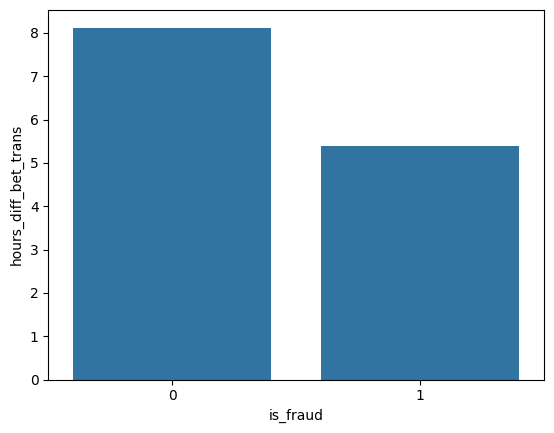

In [32]:
import pingouin

# Converter 'dob' e 'trans_date...' para datetime
df_total["dob"] = pd.to_datetime(df_total["dob"])
df_total["trans_date_trans_time"] = pd.to_datetime(df_total["trans_date_trans_time"])

#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df_total.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df_total['hours_diff_bet_trans']=((df_total.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))


df_total.loc[df_total['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df_total['hours_diff_bet_trans'] = df_total['hours_diff_bet_trans'].astype(int)


# x_0=df.groupby('is_fraud')['hours_diff_bet_trans'].mean().values[0]
# x_1=df.groupby('is_fraud')['hours_diff_bet_trans'].mean().values[1]
# std_0=df.groupby('is_fraud')['hours_diff_bet_trans'].std().values[0]
# std_1=df.groupby('is_fraud')['hours_diff_bet_trans'].std().values[1]
# n_0=df.groupby('is_fraud')['hours_diff_bet_trans'].count().values[0]
# n_1=df.groupby('is_fraud')['hours_diff_bet_trans'].count().values[1]
# numerator = x_0 - x_1
# domin = np.sqrt(std_0**2/n_0 + std_1**2/n_1)
# t_stat=numerator/domin
# p_val = 2*(1-t.cdf(abs(t_stat),df=n_0+n_1-2))
# print(t_stat,p_val)
#----------------------
#The power of pingouin library!
print(pingouin.ttest(df_total[df_total['is_fraud'] == 0]['hours_diff_bet_trans'],
              df_total[df_total['is_fraud'] == 1]['hours_diff_bet_trans'],
              alternative='two-sided')[['T','p-val']])
sns.barplot(data=df_total,x='is_fraud',y='hours_diff_bet_trans',ci=None)
plt.show()

In [33]:
#Since p-val < 0.05,we reject the null hypothesis.
#The mean of hours is significantly different between frauds and non-frauds transactions

df_total.head()

trans_date_trans_time       cc_num  merchant  category   amt  city   lat    long  job        dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km  gender_M  hours_diff_bet_trans
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185      0.47      0.93  7.27 -0.19 43.00 -108.90 0.16 1986-02-17  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00     False                     0
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185     -0.50     -0.24 52.94 -0.19 43.00 -108.90 0.16 1986-02-17  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31     False                    19
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185     -0.13     -0.24 82.08 -0.19 43.00 -108.90 0.16 1986-02-17  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79     False                     0
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185     -0.62     -1.02 34.79 -0.19 43.00 -108.90 0.16 1986-02-17  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00     False                     3
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185     -1.30     -1.24 27.18 -0.19 43.00 -108.90 0.16 1986-02-17  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00     False                     0

In [34]:
#transformar variaveis com transformacao relevante (inicialmente) no dicionario de dados CONTINUAR

#calculando a idade
#usando a diferenca entre o nascimento e o momento da transacao para evitar distorcoes (usar a data atual criaria uma idade flutuante ao longo do tempo)
df_total["age"] = df_total.apply(lambda linha: linha["trans_date_trans_time"].year - linha["dob"].year, axis=1) #funcao lambda "linha" que aplica a subtracao de datas linha a linha no df_total atraves do apply()

#remove data de nascimento, nao e mais util
df_total.drop(columns=["dob"], inplace=True)


In [35]:
# criando variavel 'BIN' que corresponde ao codigo do banco da transacao com base no numero do cartao 'cc_num'
df_total["bin"] = df_total["cc_num"].astype(str).str[:6]

In [36]:
# extraindo variaveis do horario da transacao

# Certificando que a coluna 'trans_date_trans_time' est√° no formato datetime
df_total['trans_date_trans_time'] = pd.to_datetime(df_total['trans_date_trans_time'])

# Extraindo o dia da semana (0=segunda, 1=ter√ßa, ..., 6=domingo)
df_total['day_of_week'] = df_total['trans_date_trans_time'].dt.dayofweek

# Extraindo o m√™s
df_total['month'] = df_total['trans_date_trans_time'].dt.month

# Extraindo o hor√°rio completo (hora:minuto:segundo)
df_total['time'] = df_total['trans_date_trans_time'].dt.strftime('%H:%M:%S')


def classify_period(hour):
    if 0 <= hour < 3:
        return 'Madrugada In√≠cio'
    elif 3 <= hour < 6:
        return 'Madrugada Final'
    elif 6 <= hour < 9:
        return 'Manh√£ In√≠cio'
    elif 9 <= hour < 12:
        return 'Manh√£ Final'
    elif 12 <= hour < 15:
        return 'Tarde In√≠cio'
    elif 15 <= hour < 18:
        return 'Tarde Final'
    elif 18 <= hour < 21:
        return 'Noite In√≠cio'
    elif 21 <= hour < 24:
        return 'Noite Final'


# Extraindo a hora da transa√ß√£o
df_total['hour'] = df_total['trans_date_trans_time'].dt.hour

# Aplicando a fun√ß√£o para classificar o per√≠odo
df_total['period'] = df_total['hour'].apply(classify_period)


In [37]:
#VARAIVEL DE CONTAGEM DE VEZES QUE O CARTAO FOI USADO NAS ULTIMAS 1 HORA 
# (PRECISA INVESTIGAR SE 1 HORA E MUITO OU POUCO PARA ESSA VARIAVEL, A IDEIA E PEGAR O PADRAO DE TEMPO ENTRE UMA E OUTRA TRANSACAO FRAUDULENTA)

# Converter para datetime e ordenar
df_total['trans_date_trans_time'] = pd.to_datetime(df_total['trans_date_trans_time'])
df_total = df_total.sort_values(by=['trans_date_trans_time', 'cc_num'])

# Resetar o √≠ndice temporariamente para permitir o uso com numpy (evita erro com string como √≠ndice)
df_total_reset = df_total.reset_index()  # trans_num vira coluna

# Criar array para armazenar a contagem
trans_count_list = np.zeros(len(df_total_reset), dtype=int)

# Aplicar a contagem eficiente usando searchsorted()
for card, group in df_total_reset.groupby('cc_num'):
    timestamps = group['trans_date_trans_time'].values
    idx = np.searchsorted(timestamps, timestamps - np.timedelta64(1, 'h'), side='left')
    trans_count_list[group.index] = np.arange(len(group)) - idx

# Atribuir os valores ao DataFrame
df_total_reset['trans_count_last_hour'] = trans_count_list

# Restaurar o √≠ndice original 'trans_num'
df_total = df_total_reset.set_index('trans_num')



#validando logica (comparar as horas entre as transacoes e se a quantidade bate)
#df_filtro = df_total[df_total['cc_num'] == 	4613314721966]
#df_filtro = df_filtro[df_filtro['is_fraud'] == 1	]

#df_filtro = df_filtro.sort_values(by='trans_date_trans_time', ascending=False)  # Ordenar do maior para o menor

#df_filtro.head(1000)



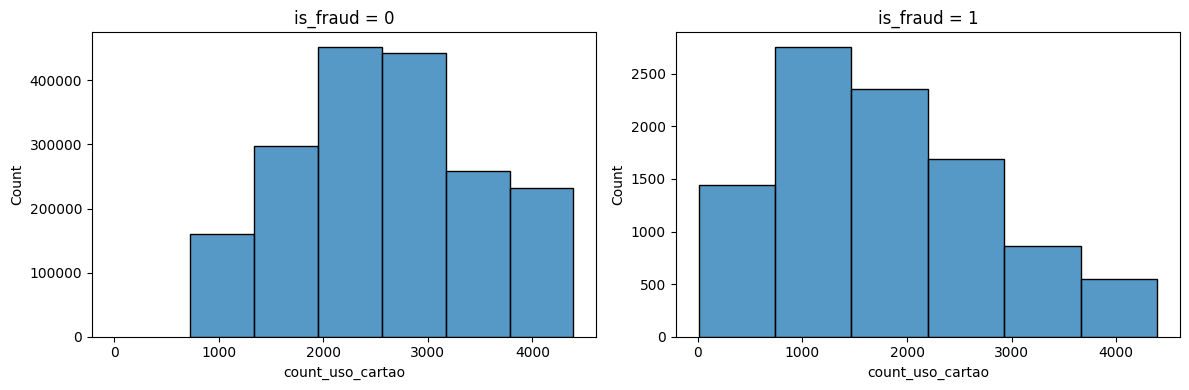

Categorias √∫nicas: [4 6 1 2 3 5]


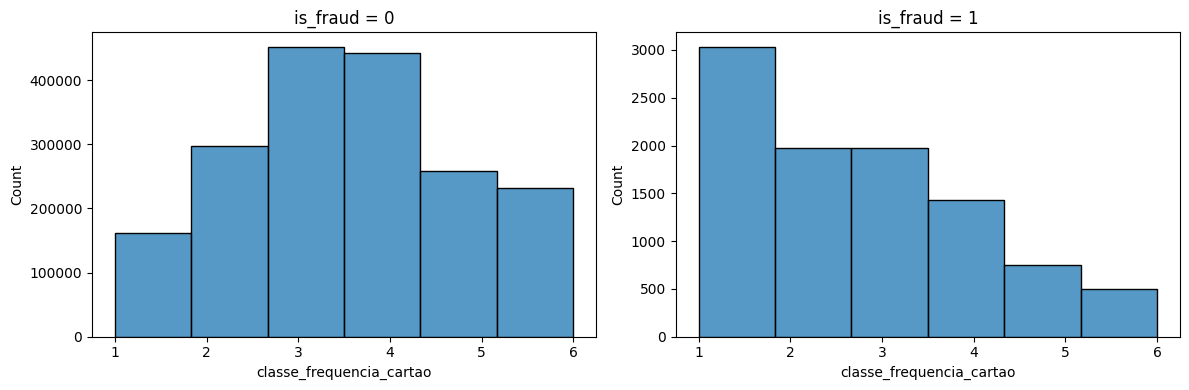

In [38]:
#VARIAVEL DE QUANTIDADE DE VEZES QUE O CARTAO DE CADA TRANSACAO FOI USADO DURANTE PERIODO TOTAL (AMOSTRA INTEIRA) E USADA PARA CRIAR UMA VARIAVEL
# DE FREQUENCIA DE USO DO CARTAO, PARA VERMOS SE OS CARTOES DE MENOS USO TEM MAIS FRAUDE OU NAO 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fun√ß√£o para exibir histogramas lado a lado
def hist_show(col):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
    for i in [0, 1]:
        sns.histplot(df_total[df_total["is_fraud"] == i][col], bins=6, ax=axs[i])
        axs[i].set_title(f'is_fraud = {i}')
    plt.tight_layout()
    plt.show()

# 2. Contar quantas vezes cada cart√£o aparece na base
df_qtd_uso_cartoes = df_total.groupby('cc_num').size().reset_index(name='count_uso_cartao')

# 3. Juntar essa informa√ß√£o de volta ao DataFrame original
df_total = df_total.merge(df_qtd_uso_cartoes, on='cc_num', how='left')

# 4. Mostrar histograma da contagem original
hist_show('count_uso_cartao')

# 5. Fun√ß√£o para classificar o uso do cart√£o em faixas
def class_det(x):
    for idx, val in enumerate(range(800, 5000, 800)):
        if x < val:
            return idx + 1
    return len(range(800, 5000, 800)) + 1  # Classe extra se acima de 5000

# 6. Criar vari√°vel categ√≥rica
df_total['classe_frequencia_cartao'] = df_total['count_uso_cartao'].apply(class_det)

# 7. Verificar as classes √∫nicas
print("Categorias √∫nicas:", df_total['classe_frequencia_cartao'].unique())

# 8. Exibir histograma da vari√°vel categorizada
hist_show('classe_frequencia_cartao')



# Define o √≠ndice novamente (foi desconfigurado nos processos anteriores)
df_total.set_index("index", inplace=True)

df_total.index.name = None #tira o cabecalho da variavel da primeira linha do df


#Aplica def de reorganizar colunas 
df_total = mover_target_para_final(df_total, 'is_fraud')

Agora, claramente, as fraudes ocorrem mais em cart√µes de cr√©dito com menos uso (novos) e, para transa√ß√µes genu√≠nas, segue uma distribui√ß√£o normal.

# Transforma√ß√£o de Hor√°rio em Vari√°veis C√≠clicas (Seno e Cosseno)

A vari√°vel time, que representa o hor√°rio da transa√ß√£o, possui natureza c√≠clica, ou seja, ap√≥s 23:59 o ciclo recome√ßa em 00:00. Modelos de Machine Learning n√£o entendem esse padr√£o circular por padr√£o, e tratam 23h e 0h como distantes, quando na verdade s√£o muito pr√≥ximas.

Para capturar essa ciclicidade corretamente, transformamos a hora em duas novas vari√°veis usando fun√ß√µes trigonom√©tricas:

time_sin = sin(2œÄ * hora / 24)

time_cos = cos(2œÄ * hora / 24)

Essas vari√°veis projetam o hor√°rio em um c√≠rculo unit√°rio, permitindo que o modelo entenda a transi√ß√£o natural entre hor√°rios e aprenda padr√µes temporais com mais precis√£o.

Essa t√©cnica √© especialmente √∫til em modelos lineares, onde rela√ß√µes c√≠clicas n√£o s√£o captadas automaticamente.

In [39]:

# Converter a coluna 'time' de string para datetime.time
df_total['time'] = pd.to_datetime(df_total['time'], format='%H:%M:%S').dt.time

# Extrair a hora, minuto e segundo como n√∫mero decimal de hora
df_total['hora_decimal'] = df_total['time'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

# Codifica√ß√£o c√≠clica: seno e cosseno da hora do dia
df_total['time_sin'] = np.sin(2 * np.pi * df_total['hora_decimal'] / 24)
df_total['time_cos'] = np.cos(2 * np.pi * df_total['hora_decimal'] / 24)



#dropando variavel 'time' apos transformaca, caso ela seja necessaia para calcular o tempo entre trnasacoes (se essa variavel for viabilizada, esta em analise se faz sentido) 
#basta comentar essa parte do codigo que ela se mantem 

# Dropando colunas desnecessarias
colunas_excluir = ['time']
df_total = Limpa_df(df_total, colunas_excluir)


#visualizando nova feature
pd.set_option('display.max_rows', None)
df_total.head(10)

trans_date_trans_time            cc_num  merchant  category    amt  city   lat    long   job  merch_lat  merch_long  distancia_km  gender_M  hours_diff_bet_trans  age     bin  day_of_week  month  hour            period  trans_count_last_hour  count_uso_cartao  classe_frequencia_cartao  is_fraud  hora_decimal  time_sin  time_cos
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095      1.01      0.93   4.97 -0.24 36.08  -81.18 -0.40      36.01      -82.05          0.00     False                     0   31  270318            1      1     0  Madrugada In√≠cio                      0              2927                         4         0          0.01      0.00      1.00
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322      0.68      0.89 107.23 -0.80 48.89 -118.21 -0.69      49.16     -118.19         30.21     False                     0   41  630423            1      1     0  Madrugada In√≠cio                      0              4362                         6         0          0.01      0.00      1.00
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661     -0.83     -0.87 220.11  0.86 42.18 -112.26  1.49      43.15     -112.15          0.00      True                     0   57  388594            1      1     0  Madrugada In√≠cio                      0               735                         1         0          0.01      0.00      1.00
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240     -0.67     -0.24  45.00  1.43 46.23 -112.11  0.10      47.03     -112.56         95.67      True                     0   52  353409            1      1     0  Madrugada In√≠cio                      0               743                         1         0          0.02      0.01      1.00
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984     -0.40     -0.61  41.96 -0.09 38.42  -79.46 -0.09      38.67      -78.63         77.56      True                     0   33  375534            1      1     0  Madrugada In√≠cio                      0              2922                         4         0          0.05      0.01      1.00
189a841a0a8ba03058526bcfe566aab5   2019-01-01 00:04:08  4767265376804500     -0.22     -0.24  94.63  0.74 40.38  -75.20  0.49      40.65      -76.15         85.92     False                     0   58  476726            1      1     0  Madrugada In√≠cio                      0               736                         1         0          0.07      0.02      1.00
83ec1cc84142af6e2acf10c44949e720   2019-01-01 00:04:42    30074693890476     -0.54     -0.66  44.54  0.11 37.99 -100.99  0.05      37.16     -100.15          0.00     False                     0   26  300746            1      1     0  Madrugada In√≠cio                      0              2933                         4         0          0.08      0.02      1.00
6d294ed2cc447d2c71c7171a3d54967c   2019-01-01 00:05:08  6011360759745864     -0.23     -0.24  71.65  0.05 38.84  -78.60  0.80      38.95      -78.54         12.77      True                     0   72  601136            1      1     0  Madrugada In√≠cio                      0              1464                         2         0          0.09      0.02      1.00
fc28024ce480f8ef21a32d64c93a29f5   2019-01-01 00:05:18  4922710831011201     -0.88     -0.61   4.27  0.53 40.34  -79.66  0.37      40.35      -79.96         25.27     False                     0   78  492271            1      1     0  Madrugada In√≠cio                      0              1470                         2         0          0.09      0.02      1.00
3b9014ea8fb80bd65de0b1463b00b00e   2019-01-01 00:06:01  2720830304681674      0.79      0.89 198.39  0.27 36.52  -87.35  0.36      37.18      -87.49         74.08     False                     0   45  272083            1      1     0  Madrugada In√≠cio                      0              1467                         2         0          0.10      0.03      1.00

* verificando os tipos das variaveis e a contagem de categorias das categoricas 
    * das 3 categoricas e possivel notar que a vartaivel bin que corresponde ao codigo do suposto banco de cada transacao, tem muitas categorias (muitos bancos) isso torna inviavel one hot encoder
    * Entao na celula seguinte, foi verificado dos bancos mais ofensores em percentual de fraudes por transacao, para encontrar algum padrao 
    * Dado isso, ser√° aplicada uma transforma√ß√£o de Target Encoding (neste caso, Mean Encoding), que substitui cada categoria de bin pela m√©dia do target (propor√ß√£o m√©dia de fraude) dentro daquela categoria. 
        * Para evitar overfitting e vazamento de dados, a codifica√ß√£o ser√° aplicada separadamente dentro de cada fold durante a valida√ß√£o cruzada e, posteriormente, no conjunto de teste de forma independente. 
        * Al√©m disso, ser√° utilizado o par√¢metro smoothing, que atua como uma forma de regulariza√ß√£o. O smoothing realiza um balanceamento entre a m√©dia do target por categoria e a m√©dia global do target, dando mais peso √† m√©dia global em categorias com poucas observa√ß√µes. Isso ajuda a suavizar os valores atribu√≠dos a categorias raras e reduz o risco de superestimar seu efeito, tornando o modelo mais robusto.

In [40]:

# VERIFICANDO OS TIPOS PARA POSSIVEL TRANSFORMACAO 
print(df_total.dtypes)

print('')
# Selecionar colunas do tipo object
object_cols = df_total.select_dtypes(include='object').columns

# Contar categorias √∫nicas em cada uma
for col in object_cols:
    print(f"{col}: {df_total[col].nunique()} categorias √∫nicas")



trans_date_trans_time       datetime64[ns]
cc_num                               int64
merchant                           float64
category                           float64
amt                                float64
city                               float64
lat                                float64
long                               float64
job                                float64
merch_lat                          float64
merch_long                         float64
distancia_km                       float64
gender_M                              bool
hours_diff_bet_trans                 int64
age                                  int64
bin                                 object
day_of_week                          int32
month                                int32
hour                                 int32
period                              object
trans_count_last_hour                int64
count_uso_cartao                     int64
classe_frequencia_cartao             int64
is_fraud   

In [41]:
# Agrupamento por bin com os indicadores
resumo_bin = (
    df_total
    .groupby('bin')
    .agg(
        proporcao_fraude=('is_fraud', 'mean'),
        contagem_fraude=('is_fraud', 'sum'),
        total_transacoes=('is_fraud', 'count')
    )
    .reset_index()
    .sort_values(by='proporcao_fraude', ascending=False)
)

# Auemntar para uns 100 para ver a quebra dos bancos mais ofensores em percentual
resumo_bin.head(10) 


bin  proporcao_fraude  contagem_fraude  total_transacoes
27   180098              1.00               12                12
4    180020              1.00               12                12
26   180097              1.00                7                 7
7    180038              1.00               10                10
960  676179              1.00               11                11
259  352804              1.00               11                11
603  441767              1.00               11                11
299  354733              1.00               11                11
283  354041              1.00                8                 8
922  651777              1.00               11                11

In [42]:
# Dropando colunas desnecessarias
#hour sai porque ja foi criada variaveis ciclicas com  Sen e Cos 
colunas_excluir = ['lat', 'long', 'merch_lat', 'merch_long','cc_num','hour']
df_total = Limpa_df(df_total, colunas_excluir)
df_total.head()

trans_date_trans_time  merchant  category    amt  city   job  distancia_km  gender_M  hours_diff_bet_trans  age     bin  day_of_week  month            period  trans_count_last_hour  count_uso_cartao  classe_frequencia_cartao  is_fraud  hora_decimal  time_sin  time_cos
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18      1.01      0.93   4.97 -0.24 -0.40          0.00     False                     0   31  270318            1      1  Madrugada In√≠cio                      0              2927                         4         0          0.01      0.00      1.00
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      0.68      0.89 107.23 -0.80 -0.69         30.21     False                     0   41  630423            1      1  Madrugada In√≠cio                      0              4362                         6         0          0.01      0.00      1.00
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51     -0.83     -0.87 220.11  0.86  1.49          0.00      True                     0   57  388594            1      1  Madrugada In√≠cio                      0               735                         1         0          0.01      0.00      1.00
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16     -0.67     -0.24  45.00  1.43  0.10         95.67      True                     0   52  353409            1      1  Madrugada In√≠cio                      0               743                         1         0          0.02      0.01      1.00
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06     -0.40     -0.61  41.96 -0.09 -0.09         77.56      True                     0   33  375534            1      1  Madrugada In√≠cio                      0              2922                         4         0          0.05      0.01      1.00

# Aplicar a selecao de fatures por importancia antes do modelo (CONTINUAR)

In [43]:
#################################################

# Modelagem (separar um pouco essa fase, aqui tem separacao de treino e teste, optuna, aplicao final... separa para nao ficar pesada a leitura e correcoes, tipo modularizar mesmo)

* estudar a criacao de uma variavel que identifica a distancia (se e anormal) entre duas transacoes, acho que usar o racional da variavel de contagem de vezes que o cartao foi usado na ultima hora (trans_count_last_hour) 
ex: uma transacao feita presencialemnte seguida de outra presencialmente em locais muito distantes em 1 hora (ou outro periodo se for o caso) podem indicar uma possivel fraude

* Definindo funcoes transformadoras nas variaveis que serao usadas para feature importance, analise de correlacoes e fornecidas finalmente para o modelo 

In [44]:
# ====================
#  1. funcoes transformadoras 
# ====================

# ====================
#  Target Encoding
# ====================
def apply_target_encoding(train, val_or_test, col, target, smoothing=15):
    global_mean = train[target].mean()
    stats = train.groupby(col)[target].agg(['mean', 'count'])
    smooth = (stats['mean'] * stats['count'] + global_mean * smoothing) / (stats['count'] + smoothing)
    encoded_col = val_or_test[col].map(smooth).fillna(global_mean)
    return encoded_col

# ====================
#  # One-Hot Encoding para colunas categ√≥ricas
# ====================

def fit_transform_ohe(train_df, val_df, col):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_encoded = ohe.fit_transform(train_df[[col]])
    val_encoded = ohe.transform(val_df[[col]])

    train_ohe = pd.DataFrame(train_encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]], index=train_df.index)
    val_ohe = pd.DataFrame(val_encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]], index=val_df.index)

    return train_ohe, val_ohe, ohe


* Dividindo em treino e teste 

In [45]:
#teste usando as posicoes originais dos dados de treino e teste (aqui e pra testar se ha vies de selecao nas bases originais, se o resultado for excelente entao sim teve)
# ====================
# 2. Split em treino e teste
# ====================


# Passo 1: Pegar os trans_num originais
trans_train_ids = df_orig_train['trans_num'].unique()
trans_test_ids = df_orig_test['trans_num'].unique()

# Passo 2: Separar X e y do df_total
X = df_total.drop('is_fraud', axis=1)
y = df_total['is_fraud']

# Passo 3: Usar o √≠ndice (que √© o trans_num em df_total) para separar
X_train = X.loc[X.index.isin(trans_train_ids)].copy()
X_test = X.loc[X.index.isin(trans_test_ids)].copy()

y_train = y.loc[y.index.isin(trans_train_ids)].copy()
y_test = y.loc[y.index.isin(trans_test_ids)].copy()

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Total shape:", X.shape, y.shape)

print("Checagem duplicidade entre conjuntos:", set(X_train.index) & set(X_test.index))  # Deve ser vazio


# Dropa as vari√°veis indesejadas em treino e teste
cols_to_drop = ['trans_date_trans_time', 'cc_num']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')
X  = X.drop(columns=cols_to_drop, errors='ignore')

# Junta X_train e y_train para uso no Optuna
df_train = X_train.copy()
df_train['is_fraud'] = y_train

target = 'is_fraud'



Train shape: (1296675, 20) (1296675,)
Test shape: (555719, 20) (555719,)
Total shape: (1852394, 20) (1852394,)
Checagem duplicidade entre conjuntos: set()


In [46]:
X_train.head()

merchant  category    amt  city   job  distancia_km  gender_M  hours_diff_bet_trans  age     bin  day_of_week  month            period  trans_count_last_hour  count_uso_cartao  classe_frequencia_cartao  hora_decimal  time_sin  time_cos
0b242abb623afc578575680df30655b9      1.01      0.93   4.97 -0.24 -0.40          0.00     False                     0   31  270318            1      1  Madrugada In√≠cio                      0              2927                         4          0.01      0.00      1.00
1f76529f8574734946361c461b024d99      0.68      0.89 107.23 -0.80 -0.69         30.21     False                     0   41  630423            1      1  Madrugada In√≠cio                      0              4362                         6          0.01      0.00      1.00
a1a22d70485983eac12b5b88dad1cf95     -0.83     -0.87 220.11  0.86  1.49          0.00      True                     0   57  388594            1      1  Madrugada In√≠cio                      0               735                         1          0.01      0.00      1.00
6b849c168bdad6f867558c3793159a81     -0.67     -0.24  45.00  1.43  0.10         95.67      True                     0   52  353409            1      1  Madrugada In√≠cio                      0               743                         1          0.02      0.01      1.00
a41d7549acf90789359a9aa5346dcb46     -0.40     -0.61  41.96 -0.09 -0.09         77.56      True                     0   33  375534            1      1  Madrugada In√≠cio                      0              2922                         4          0.05      0.01      1.00

# ====================
# 2. Split em treino e teste
# ====================
X = df_total.drop('is_fraud', axis=1)
y = df_total['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Dropa as vari√°veis indesejadas em treino e teste
cols_to_drop = ['trans_date_trans_time', 'cc_num']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')
X  = X.drop(columns=cols_to_drop, errors='ignore')

# Junta X_train e y_train para uso no Optuna
df_train = X_train.copy()
df_train['is_fraud'] = y_train

target = 'is_fraud'


* Analisando correlacoes 
    * a funcao aqui aplica as mesmas transformacoes que sao aplicadas no treino e no teste, mas com uma funcao separada para deixar as usadas no modelo somente para o modelo 
    * e feita uam copia do df_treino para preservar o df_treino do modelo. 

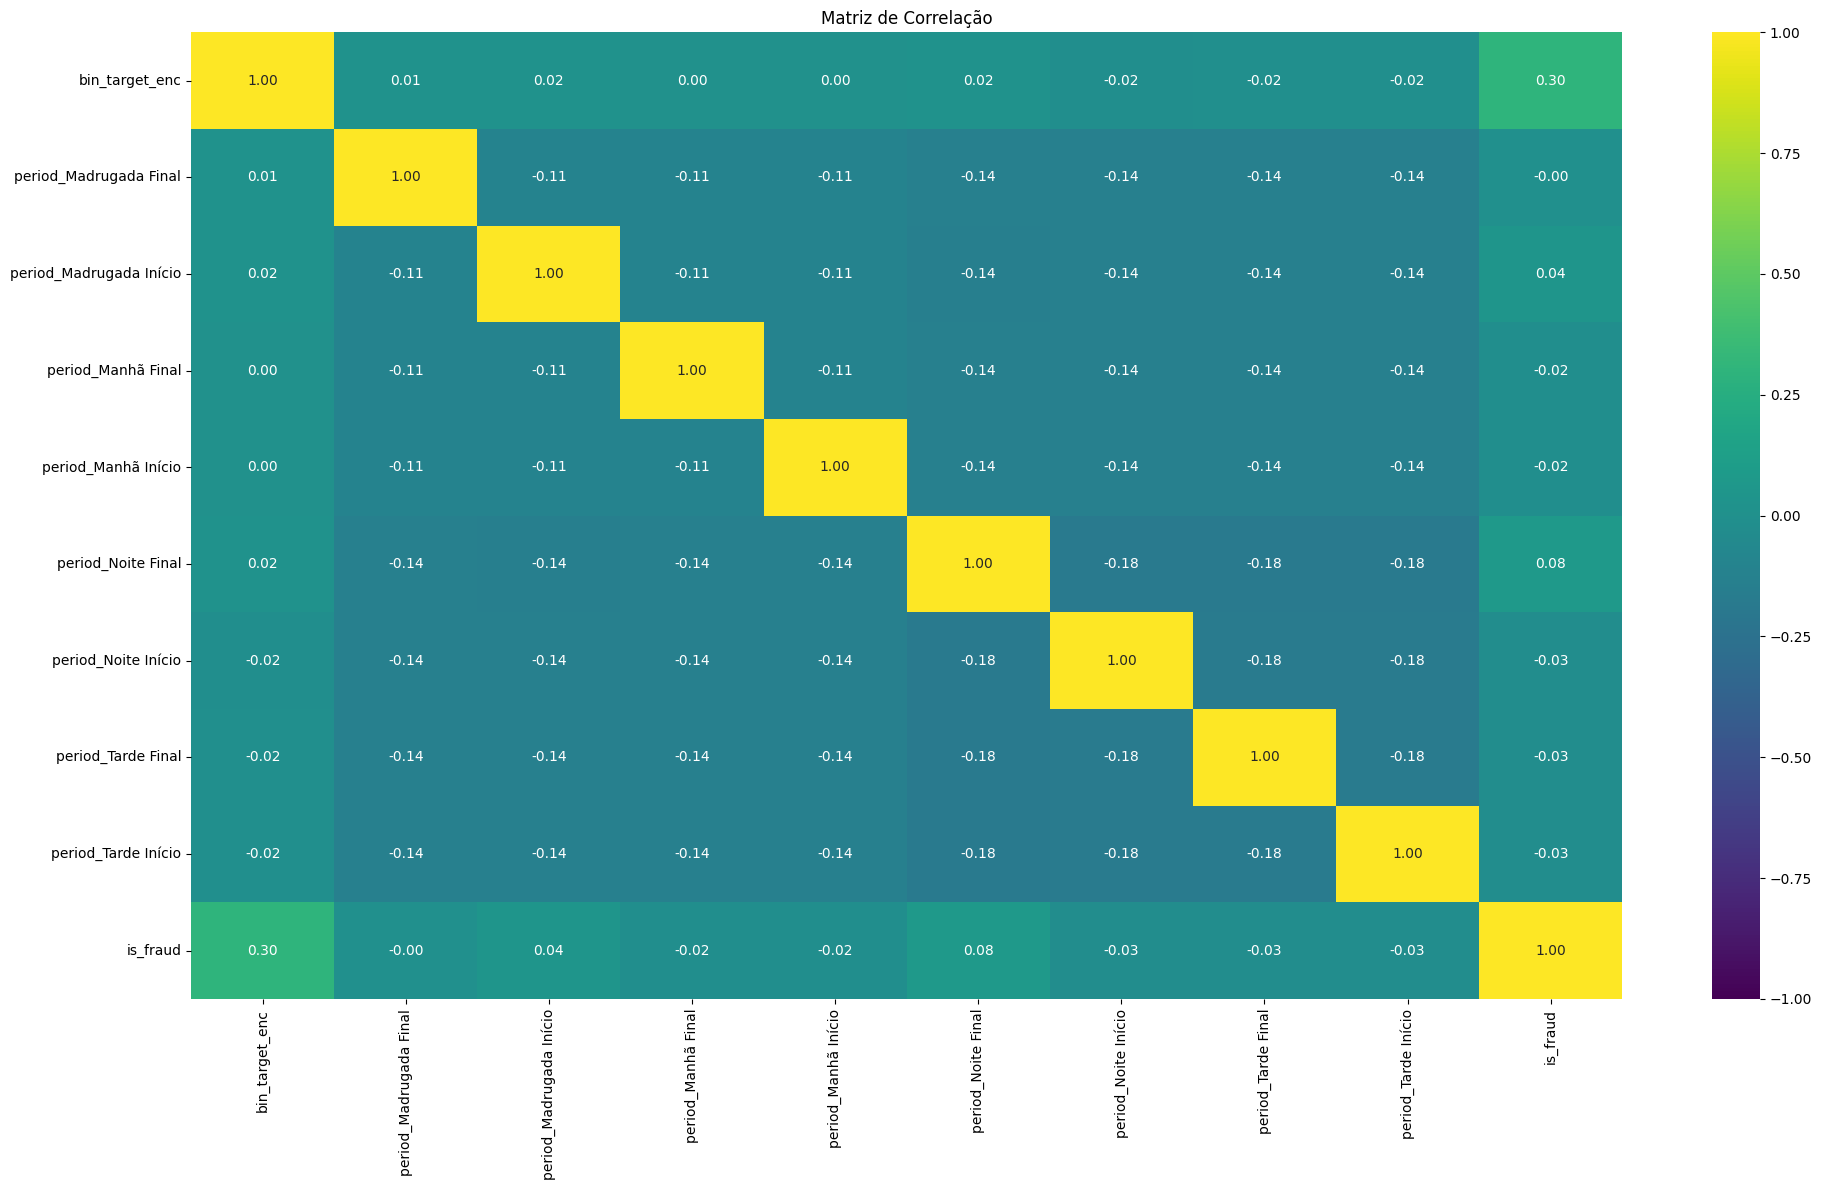

In [47]:
def prepare_df_train_temp(df_train, target):
    # Cria uma c√≥pia para preservar o original
    df_train_temp = df_train.copy()

    # ====== Target Encoding ======
    df_train_temp['bin_target_enc'] = apply_target_encoding(df_train, df_train_temp, 'bin', target)

    # ====== OneHot Encoding ======
    #_, ohe_cat_df, ohe_cat = fit_transform_ohe(df_train, df_train_temp, 'category')
    _, ohe_period_df, ohe_period = fit_transform_ohe(df_train, df_train_temp, 'period')

    # ====== Junta todas as features ======
    #X_temp = pd.concat([df_train_temp[['bin_target_enc']], ohe_cat_df, ohe_period_df], axis=1)
    X_temp = pd.concat([df_train_temp[['bin_target_enc']], ohe_period_df], axis=1)

    # ====== Scaling ======
    scaler = StandardScaler()
    X_temp_scaled = scaler.fit_transform(X_temp)

    # Retorna como DataFrame para an√°lise de correla√ß√£o
    X_temp_scaled_df = pd.DataFrame(X_temp_scaled, columns=X_temp.columns, index=df_train_temp.index)
    X_temp_scaled_df[target] = df_train_temp[target]  # anexa target para facilitar an√°lise

    return X_temp_scaled_df




#chamando def 
df_train_temp = prepare_df_train_temp(df_train, target)


# Suprimir todos os warnings
warnings.filterwarnings("ignore")

# Criar a figura com 1 subgr√°fico (apenas o gr√°fico de correla√ß√£o)
fig, axes = plt.subplots(1, 1, figsize=(20, 12))

# Matriz de correla√ß√£o
sns.heatmap(df_train_temp.corr(), annot=True, cmap="viridis", fmt=".2f", ax=axes, vmin=-1, vmax=1)
axes.set_title('Matriz de Correla√ß√£o')

# Ajustar o layout
plt.tight_layout()
plt.show()



# Importancias das variaveis com Mutual Information

In [48]:
df_train.head(10)

merchant  category    amt  city   job  distancia_km  gender_M  hours_diff_bet_trans  age     bin  day_of_week  month            period  trans_count_last_hour  count_uso_cartao  classe_frequencia_cartao  hora_decimal  time_sin  time_cos  is_fraud
0b242abb623afc578575680df30655b9      1.01      0.93   4.97 -0.24 -0.40          0.00     False                     0   31  270318            1      1  Madrugada In√≠cio                      0              2927                         4          0.01      0.00      1.00         0
1f76529f8574734946361c461b024d99      0.68      0.89 107.23 -0.80 -0.69         30.21     False                     0   41  630423            1      1  Madrugada In√≠cio                      0              4362                         6          0.01      0.00      1.00         0
a1a22d70485983eac12b5b88dad1cf95     -0.83     -0.87 220.11  0.86  1.49          0.00      True                     0   57  388594            1      1  Madrugada In√≠cio                      0               735                         1          0.01      0.00      1.00         0
6b849c168bdad6f867558c3793159a81     -0.67     -0.24  45.00  1.43  0.10         95.67      True                     0   52  353409            1      1  Madrugada In√≠cio                      0               743                         1          0.02      0.01      1.00         0
a41d7549acf90789359a9aa5346dcb46     -0.40     -0.61  41.96 -0.09 -0.09         77.56      True                     0   33  375534            1      1  Madrugada In√≠cio                      0              2922                         4          0.05      0.01      1.00         0
189a841a0a8ba03058526bcfe566aab5     -0.22     -0.24  94.63  0.74  0.49         85.92     False                     0   58  476726            1      1  Madrugada In√≠cio                      0               736                         1          0.07      0.02      1.00         0
83ec1cc84142af6e2acf10c44949e720     -0.54     -0.66  44.54  0.11  0.05          0.00     False                     0   26  300746            1      1  Madrugada In√≠cio                      0              2933                         4          0.08      0.02      1.00         0
6d294ed2cc447d2c71c7171a3d54967c     -0.23     -0.24  71.65  0.05  0.80         12.77      True                     0   72  601136            1      1  Madrugada In√≠cio                      0              1464                         2          0.09      0.02      1.00         0
fc28024ce480f8ef21a32d64c93a29f5     -0.88     -0.61   4.27  0.53  0.37         25.27     False                     0   78  492271            1      1  Madrugada In√≠cio                      0              1470                         2          0.09      0.02      1.00         0
3b9014ea8fb80bd65de0b1463b00b00e      0.79      0.89 198.39  0.27  0.36         74.08     False                     0   45  272083            1      1  Madrugada In√≠cio                      0              1467                         2          0.10      0.03      1.00         0

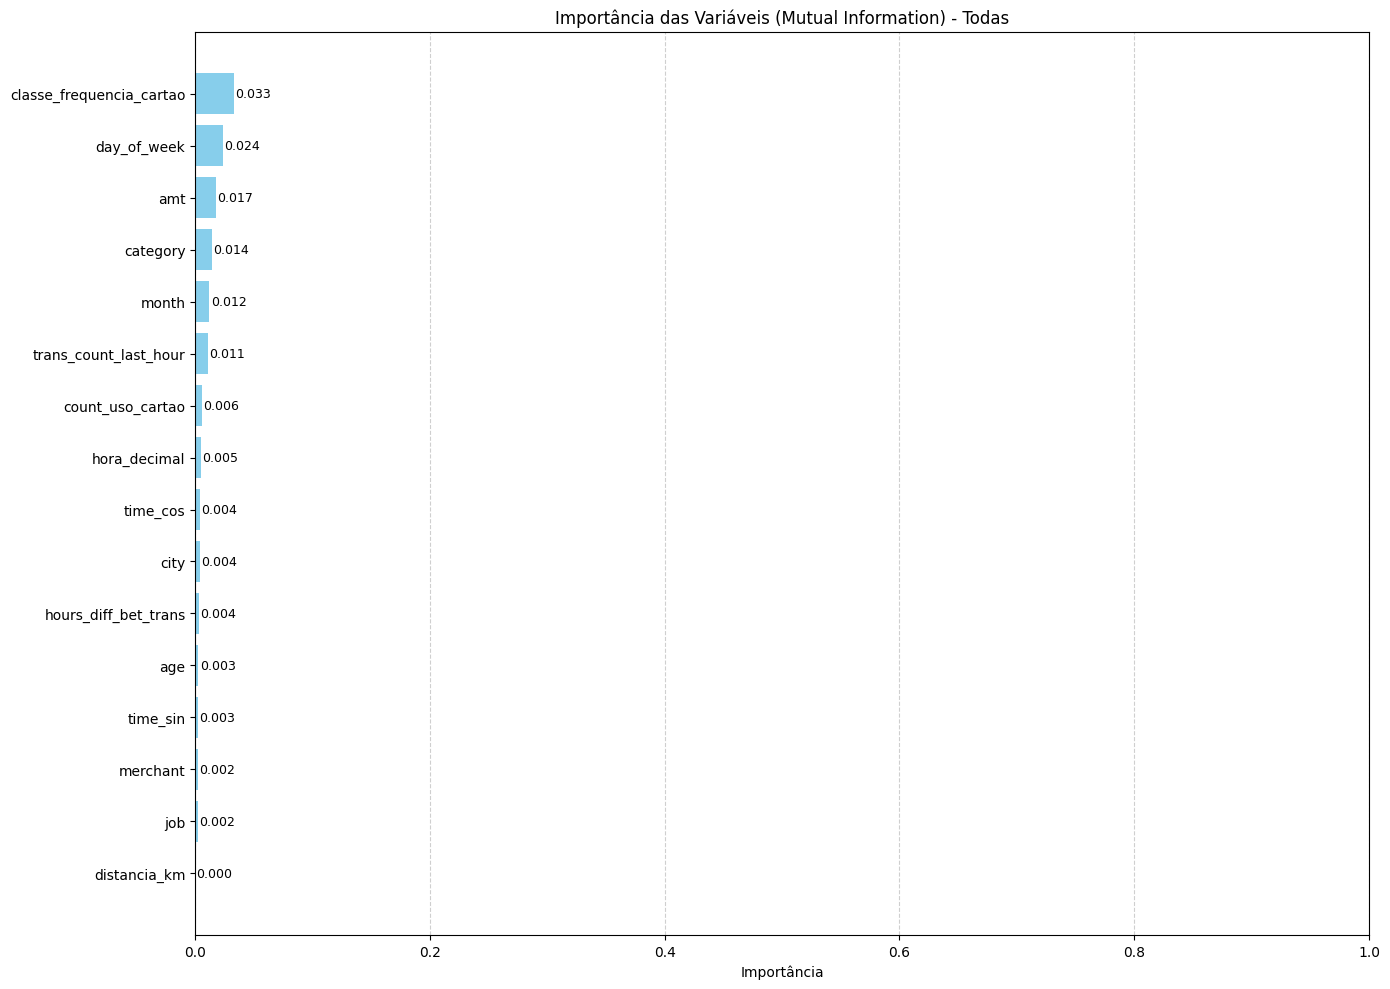

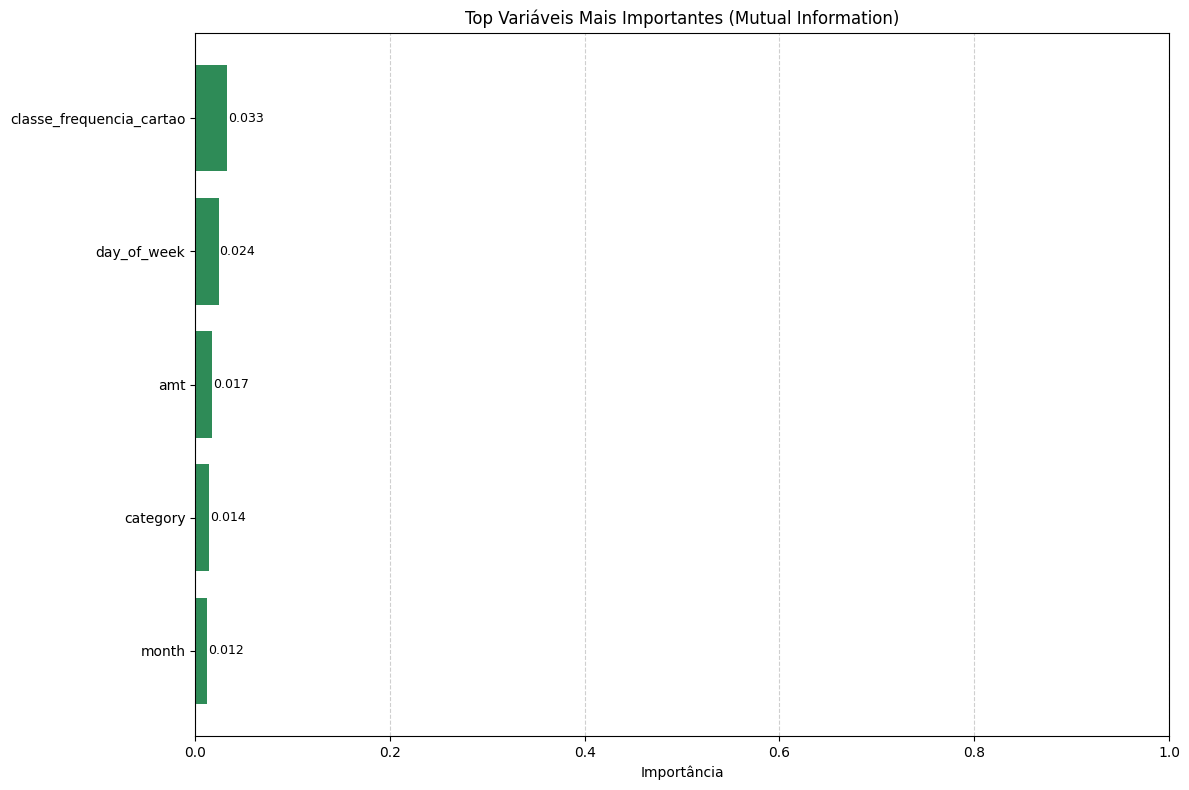

In [49]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# C√≥pia da base original
df_temp = df_train.copy()

# Define as vari√°veis obrigat√≥rias que sempre ficam
keep_vars = ['bin', 'period', target]

# Cria X e y
X = df_temp.drop(columns=[target, 'bin', 'period'], errors='ignore')
y = df_temp[target]

# Filtra apenas vari√°veis num√©ricas
X = X.select_dtypes(include=[np.number])

# Calcula mutual information
mi = mutual_info_classif(X, y, n_neighbors=5, random_state=42)
mi_importances = pd.Series(mi, index=X.columns, name="MutualInformation")

# Seleciona as top vari√°veis
top = mi_importances.sort_values(ascending=False).head(5).index.tolist()

# Atualiza df_train com top + vari√°veis obrigat√≥rias
df_train = df_temp[top + keep_vars]

# üìä Gr√°fico com todas as vari√°veis num√©ricas
plt.figure(figsize=(14, 10))
mi_sorted = mi_importances.sort_values(ascending=True)
bars = plt.barh(mi_sorted.index, mi_sorted.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             va='center', fontsize=9)

plt.title("Import√¢ncia das Vari√°veis (Mutual Information) - Todas")
plt.xlabel("Import√¢ncia")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# üìä Gr√°fico com apenas as top vari√°veis
plt.figure(figsize=(12, 8))
top_sorted = mi_importances[top].sort_values(ascending=True)
bars_top = plt.barh(top_sorted.index, top_sorted.values, color='seagreen')

for bar in bars_top:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             va='center', fontsize=9)

plt.title("Top Vari√°veis Mais Importantes (Mutual Information)")
plt.xlabel("Import√¢ncia")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [50]:
df_train.head(10)

classe_frequencia_cartao  day_of_week    amt  category  month     bin            period  is_fraud
0b242abb623afc578575680df30655b9                         4            1   4.97      0.93      1  270318  Madrugada In√≠cio         0
1f76529f8574734946361c461b024d99                         6            1 107.23      0.89      1  630423  Madrugada In√≠cio         0
a1a22d70485983eac12b5b88dad1cf95                         1            1 220.11     -0.87      1  388594  Madrugada In√≠cio         0
6b849c168bdad6f867558c3793159a81                         1            1  45.00     -0.24      1  353409  Madrugada In√≠cio         0
a41d7549acf90789359a9aa5346dcb46                         4            1  41.96     -0.61      1  375534  Madrugada In√≠cio         0
189a841a0a8ba03058526bcfe566aab5                         1            1  94.63     -0.24      1  476726  Madrugada In√≠cio         0
83ec1cc84142af6e2acf10c44949e720                         4            1  44.54     -0.66      1  300746  Madrugada In√≠cio         0
6d294ed2cc447d2c71c7171a3d54967c                         2            1  71.65     -0.24      1  601136  Madrugada In√≠cio         0
fc28024ce480f8ef21a32d64c93a29f5                         2            1   4.27     -0.61      1  492271  Madrugada In√≠cio         0
3b9014ea8fb80bd65de0b1463b00b00e                         2            1 198.39      0.89      1  272083  Madrugada In√≠cio         0

# Outliers 

* AQUI SE ANALISOU OS OUTLIERS PARA TRATAMENTOS POSTERIOES, DENTRO DOS FOLDS, NO TREINAMENTO FINAL, E SEMPRE OBSERVANDO O CUIDADO PARA VAZAMENTO DE DADOS ENTRE TREINO E TESTE. 



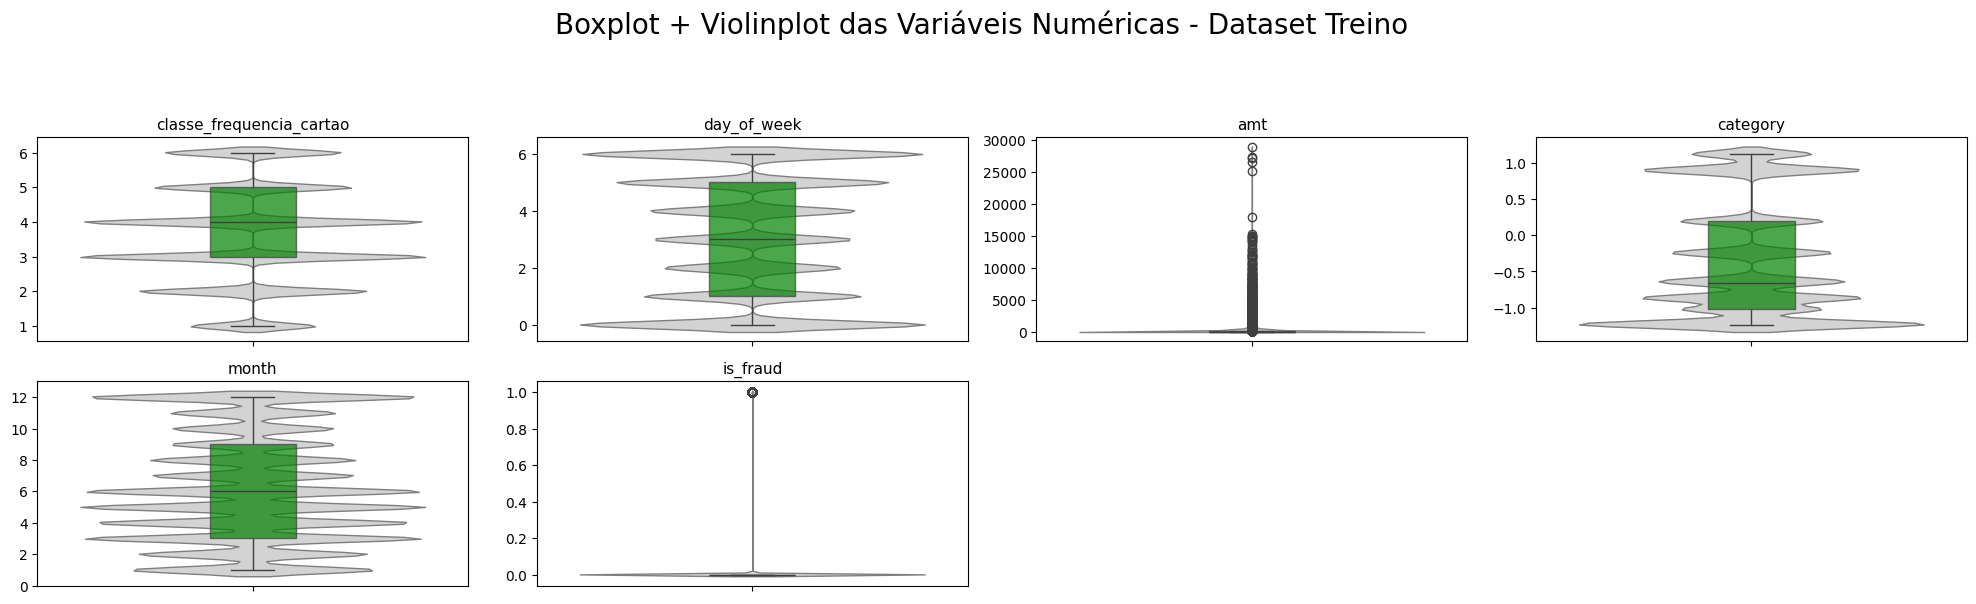

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# lista das vari√°veis num√©ricas que voc√™ quer visualizar
variaveis = df_train.select_dtypes(include='number').columns.tolist()

# tamanho da figura
plt.figure(figsize=(20, 16))

# loop de cria√ß√£o de subplots com boxplot + violinplot
for i, var in enumerate(variaveis):
    plt.subplot(6, 4, i + 1)  # define a grade de 6 linhas x 4 colunas (ajuste conforme o n√∫mero de vari√°veis)
    
    # violinplot com largura menor para n√£o sobrepor tanto
    sns.violinplot(y=df_train[var], inner=None, color='lightgray', linewidth=1)
    
    # boxplot por cima
    sns.boxplot(y=df_train[var],
                boxprops=dict(facecolor='green', alpha=0.7),
                width=0.2)
    
    plt.title(f'{var}', fontsize=11)
    plt.ylabel('')

# t√≠tulo geral
plt.suptitle('Boxplot + Violinplot das Vari√°veis Num√©ricas - Dataset Treino', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [52]:
#funcao que ira tratar o outliers posteriormente
def cria_flags_outliers(df, limites=(0.01, 0.01)):
    """
    Cria vari√°veis bin√°rias indicando se um valor √© extremo com base nos percentis definidos.
    
    Par√¢metros:
        df (pd.DataFrame): DataFrame de entrada
        limites (tuple): limites inferiores e superiores (ex: (0.01, 0.01) = 1%)
    
    Retorna:
        df_outliers (pd.DataFrame): DataFrame com vari√°veis bin√°rias de outlier adicionadas
    """
    df_outliers = df.copy()
    for col in df_outliers.select_dtypes(include=[np.number]).columns:
        p_inf = df_outliers[col].quantile(limites[0])
        p_sup = df_outliers[col].quantile(1 - limites[1])
        nova_coluna = f'{col}_outlier'
        df_outliers[nova_coluna] = ((df_outliers[col] < p_inf) | (df_outliers[col] > p_sup)).astype(int)
    return df_outliers


# Estudo com Optuna: Melhores hiperparametros

In [53]:
print("qtd de variaveis e observacoes usados no treino:",df_train.shape)

qtd de variaveis e observacoes usados no treino: (1296675, 8)


In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import torch
import warnings
warnings.filterwarnings("ignore", message="A module that was compiled using NumPy 1.x cannot be run in NumPy 2.1.3")
 
#reclama por incompatibilidade com aversao do numpy antes e do numpy que o torch usa, se der problema mais pra 
# frente so comentar esse trecho, instalar as lib nas versoes novas e ser feliz 


# Verifica se h√° GPU dispon√≠vel
use_gpu = torch.cuda.is_available()
device = "cuda" if use_gpu else "cpu"
tree_method_ = "gpu_hist" if use_gpu else "hist"

print(f"Usando GPU: {use_gpu}")
print(f"M√©todo de √°rvore: {tree_method_}")


# ====================
# 3. Otimiza√ß√£o com Optuna
# ====================

#variaveis Globais 
threshold = 0.5

n_trials_= 10

n_splits_ = 5

##############################################################################################################
######################## TESTANDO REAMOSTRAGEM (OU SEM REAMOSTRAGEM) #########################################
##############################################################################################################


# ========================
# SEM REAMOSTRAGEM
# ========================
#smote_ = None


# ========================
# OVERSAMPLING
# ========================

# SMOTE: t√©cnica padr√£o que gera exemplos sint√©ticos entre vizinhos da minoria
# smote_ = SMOTE(random_state=42) #TESTADO, RESULTADO INICIAL 

# ADASYN: gera mais amostras onde a classe minorit√°ria √© mais dif√≠cil de aprender
# smote_ = ADASYN(random_state=42) #TESTADO, NAO MUDA PRATICAMENTE NADA 

# KMeansSMOTE: usa clustering com K-Means para gerar amostras mais representativas
# smote_ = KMeansSMOTE(random_state=42)  # TESTADO E NAO FUNCIONA DENTRO DOS FOLDS POR CAUSA DA CLASSE EXTREMAMENTE RARA, DESSA FORMA NAO CONSEGUE CONSTRUIR O CLUSTER                                              

# BorderlineSMOTE-1: foca em exemplos pr√≥ximos √† fronteira de decis√£o
# smote_ = BorderlineSMOTE(kind='borderline-1', random_state=42) # TESTADO, MUDA QUASE NADA

#BorderlineSMOTE-2: vers√£o mais agressiva que tamb√©m usa amostras da majorit√°ria
#smote_ = BorderlineSMOTE(kind='borderline-2', random_state=42)

# RandomOverSampler: replica exemplos da classe minorit√°ria aleatoriamente
# smote_ = RandomOverSampler(random_state=42)


# ========================
# UNDERSAMPLING
# ========================

# RandomUnderSampler: remove aleatoriamente exemplos da classe majorit√°ria
#smote_ = RandomUnderSampler(random_state=42) #testei mas nao faz muito sentido nem e inteligente ser aleatorio, se ele pegar caso de fraude vai piorar oque ja e ruim 

# TomekLinks: remove pares de amostras vizinhas (uma de cada classe) que est√£o muito pr√≥ximas (amb√≠guas).
#smote_ = TomekLinks() #TESTADO MAS SEM BONS RESULTADOS, ELE SOZINHO TENDE A SER PESADO E NAO RESOLVER A EXPRESSIVIDADE DA CLASSE RARA, ELE DE FORMA HIBRIDA COM O SMOTE E MAIS COMUM. 

# EditedNearestNeighbours (ENN): remove exemplos mal classificados pelos vizinhos
#smote_ = EditedNearestNeighbours() #TESTADO MAS SEM BONS RESULTADOS, ELE SOZINHO TENDE A SER PESADO E NAO RESOLVER A EXPRESSIVIDADE DA CLASSE RARA, ELE DE FORMA HIBRIDA COM O SMOTE E MAIS COMUM. 


# ========================
# √âCNICAS H√çBRIDAS (Oversampling + Limpeza (undersampling) )
# ========================

# SMOTETomek: aplica SMOTE e remove pares amb√≠guos com Tomek Links (uma das tecnicas de undersampling)
#smote_ = SMOTETomek(random_state=42)

# SMOTEENN: aplica SMOTE e depois remove ru√≠dos com ENN
# smote_ = SMOTEENN(random_state=42)



weights_skf = {
    'Accuracy': 0.0,          # Irrelevante em dados desbalanceados (pode mascarar a performance real)
    'f1': 0.05,                # M√©dia harm√¥nica entre precis√£o e recall (bom equil√≠brio)
    'precision': 0.45,         # Indica a propor√ß√£o de positivos corretos (penaliza falsos positivos)
    'recall': 0.35,            # Mede quantos positivos reais foram capturados (importante em fraudes)
    'auc': 0.05,               # Mede a capacidade geral de separa√ß√£o entre classes
    'balanced_acc': 0.0,      # M√©dia das acur√°cias por classe (corrige o vi√©s do desbalanceamento)
    'mcc': 0.1                # Avalia correla√ß√£o entre predi√ß√µes e r√≥tulos (robusto para desbalanceamento)
}



def generate_folds_and_train(trial, df_train, target, n_splits=n_splits_,smote=None):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metric_sums = {
        'Accuracy': 0,
        'f1': 0,
        'precision': 0,
        'recall': 0,
        'auc': 0,
        'balanced_acc': 0,
        'mcc': 0
    }

    for train_idx, val_idx in skf.split(df_train, df_train[target]):
        train_fold = df_train.iloc[train_idx].copy()
        val_fold = df_train.iloc[val_idx].copy()

        # ====== Target Encoding ======
        train_fold['bin_target_enc'] = apply_target_encoding(train_fold, train_fold, 'bin', target)
        val_fold['bin_target_enc'] = apply_target_encoding(train_fold, val_fold, 'bin', target)

        # OneHot Encoding nas colunas 'category' e 'period'
        #train_ohe_cat, val_ohe_cat, _ = fit_transform_ohe(train_fold, val_fold, 'category')
        train_ohe_period, val_ohe_period, _ = fit_transform_ohe(train_fold, val_fold, 'period')

        # ====== Features Finais ======
        #X_train = pd.concat([train_fold[['bin_target_enc']], train_ohe_cat, train_ohe_period], axis=1)
        #X_val = pd.concat([val_fold[['bin_target_enc']], val_ohe_cat, val_ohe_period], axis=1)

        X_train = pd.concat([train_fold[['bin_target_enc']], train_ohe_period], axis=1)
        X_val = pd.concat([val_fold[['bin_target_enc']], val_ohe_period], axis=1)

        #X_train=X_train.drop(columns='bin_target_enc') #testando sem essa variavel 
        #X_val=X_val.drop(columns='bin_target_enc') #testando sem essa variavel 


        # ====== Winsorization antes do scaling (apenas no treino!)
        X_train = cria_flags_outliers(X_train)
        X_val = cria_flags_outliers(X_val)

        print("Vari√°veis finais usadas no treino:", X_train.columns.tolist())

        # ====== Scaling ======
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        y_train = train_fold[target]
        y_val = val_fold[target]
      

        # ====== SMOTE testando opcoes ======
        if smote is not None:
            print("Aplicando SMOTE...")
            X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
        else:
            print("SMOTE n√£o foi aplicado.")



        # Calcula scale_pos_weight com base no desequil√≠brio (para cada fold e feito o mesmo no treianmetno final se alterar la tem que altera aqui e vice versa )
        # com smote precisa ser desabilitado

        if smote is None:
            # Calcula o peso da classe minorit√°ria baseado na propor√ß√£o original
            neg, pos = np.bincount(y_train)
            scale_pos_weight = neg / pos
        else:
            # Quando usa SMOTE, j√° balanceou manualmente ‚Äî n√£o precisa de peso adicional
            scale_pos_weight = 1  # (testar com None se der erro)


        # Modelo
        model = XGBClassifier(
        objective='binary:logistic',
        tree_method=tree_method_,
        use_label_encoder=False,
        eval_metric=trial.suggest_categorical("eval_metric", ["aucpr", "logloss"]),
        
        # Mais √°rvores + aprendizado mais lento
        n_estimators=trial.suggest_int("n_estimators", 500, 3000),
        learning_rate=trial.suggest_float("learning_rate", 0.001, 0.05, log=True),

        # Complexidade da √°rvore
        max_depth=trial.suggest_int("max_depth", 3, 15),
        min_child_weight=trial.suggest_float("min_child_weight", 1, 20),  # evita overfitting em classes raras

        # Subamostragem (evita overfitting)
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),

        # Regulariza√ß√£o
        gamma=trial.suggest_float("gamma", 0, 10),
        reg_alpha=trial.suggest_float("reg_alpha", 0, 5),
        reg_lambda=trial.suggest_float("reg_lambda", 0, 5),

        # Peso da classe (j√° est√° sendo tratado)
        scale_pos_weight=scale_pos_weight,

        random_state=42,
        n_jobs=-1
    )



        model.fit(X_train_scaled, y_train)
        probs = model.predict_proba(X_val_scaled)[:, 1]
        preds = (probs >= threshold).astype(int)

        # ====== M√âTRICAS ======
        # Soma as m√©tricas para cada fold
        metric_sums['Accuracy']     += accuracy_score(y_val, preds)
        metric_sums['f1']           += f1_score(y_val, preds)
        metric_sums['precision']    += precision_score(y_val, preds, zero_division=0)
        metric_sums['recall']       += recall_score(y_val, preds)
        metric_sums['auc']          += roc_auc_score(y_val, probs)
        metric_sums['balanced_acc'] += balanced_accuracy_score(y_val, preds)
        metric_sums['mcc']          += matthews_corrcoef(y_val, preds)

    # M√©dia das m√©tricas ap√≥s som√°-las nos folds
    mean_metrics = {k: v / n_splits for k, v in metric_sums.items()}

    # Calculando o score final ponderado
    final_score = sum(mean_metrics[k] * weights_skf[k] for k in weights_skf)


    #esse print nao influencia em nada, e meramente info
    print("qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao):",X_train_scaled.shape)

    return final_score


# ====================
# 4. Optuna - Otimiza√ß√£o
# ====================


#variaveis globais 

def objective(trial):
    return generate_folds_and_train(trial, df_train, target) # adicionar a variaovel smote_ para testar algum smote de reamostragem 


sampler_ = optuna.samplers.TPESampler(n_startup_trials=50, 
                                      n_ei_candidates=35, 
                                      group=True,
                                      seed=42,
                                      multivariate=True)

study = optuna.create_study(direction='maximize', sampler=sampler_, pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=15))
study.optimize(objective, n_trials=n_trials_)  
best_params = study.best_params

# Melhores hiperpar√¢metros
print("üìä MELHORES HIPERPAR√ÇMETROS ENCONTRADOS")
print("‚ïê" * 60)
for param, value in best_params.items():
    print(f"{param:<25}{value:<15}")
print("‚ïê" * 60)




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jgeov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jgeov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

Usando GPU: True
M√©todo de √°rvore: gpu_hist
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠c

[I 2025-04-16 02:10:09,284] Trial 0 finished with value: 0.35882730592977896 and parameters: {'eval_metric': 'logloss', 'n_estimators': 2330, 'learning_rate': 0.010401663679887312, 'max_depth': 5, 'min_child_weight': 3.96389588638785, 'subsample': 0.6232334448672797, 'colsample_bytree': 0.9464704583099741, 'gamma': 6.011150117432088, 'reg_alpha': 3.540362888980227, 'reg_lambda': 0.10292247147901223}. Best is trial 0 with value: 0.35882730592977896.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:11:31,163] Trial 1 finished with value: 0.35594584691905934 and parameters: {'eval_metric': 'aucpr', 'n_estimators': 1031, 'learning_rate': 0.0020366442026830914, 'max_depth': 5, 'min_child_weight': 6.780602616231217, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'gamma': 2.9122914019804194, 'reg_alpha': 3.0592644736118975, 'reg_lambda': 0.6974693032602092}. Best is trial 0 with value: 0.35882730592977896.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:13:25,713] Trial 2 finished with value: 0.35935772995994203 and parameters: {'eval_metric': 'logloss', 'n_estimators': 1640, 'learning_rate': 0.02157696745589683, 'max_depth': 5, 'min_child_weight': 10.770454329858621, 'subsample': 0.836965827544817, 'colsample_bytree': 0.6185801650879991, 'gamma': 6.075448519014383, 'reg_alpha': 0.8526206184364576, 'reg_lambda': 0.3252579649263976}. Best is trial 2 with value: 0.35935772995994203.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:16:01,181] Trial 3 finished with value: 0.35795830046157423 and parameters: {'eval_metric': 'logloss', 'n_estimators': 2521, 'learning_rate': 0.0032925293631105254, 'max_depth': 4, 'min_child_weight': 14.00042750373098, 'subsample': 0.7760609974958406, 'colsample_bytree': 0.6488152939379115, 'gamma': 4.951769101112702, 'reg_alpha': 0.17194260557609198, 'reg_lambda': 4.546602010393911}. Best is trial 2 with value: 0.35935772995994203.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:18:02,741] Trial 4 finished with value: 0.3569403159434757 and parameters: {'eval_metric': 'logloss', 'n_estimators': 1279, 'learning_rate': 0.00764856511236995, 'max_depth': 10, 'min_child_weight': 4.512234654985013, 'subsample': 0.9878338511058234, 'colsample_bytree': 0.9100531293444458, 'gamma': 9.394989415641891, 'reg_alpha': 4.474136752138244, 'reg_lambda': 2.9894998940554256}. Best is trial 2 with value: 0.35935772995994203.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:19:40,753] Trial 5 finished with value: 0.35940346810968965 and parameters: {'eval_metric': 'aucpr', 'n_estimators': 990, 'learning_rate': 0.0011935477742481386, 'max_depth': 7, 'min_child_weight': 8.384868504100158, 'subsample': 0.7085396127095583, 'colsample_bytree': 0.9314950036607718, 'gamma': 3.567533266935893, 'reg_alpha': 1.4046725484369038, 'reg_lambda': 2.7134804157912424}. Best is trial 5 with value: 0.35940346810968965.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:21:38,931] Trial 6 finished with value: 0.3510800577840682 and parameters: {'eval_metric': 'logloss', 'n_estimators': 686, 'learning_rate': 0.047499747713783964, 'max_depth': 13, 'min_child_weight': 4.775597949149276, 'subsample': 0.602208846849441, 'colsample_bytree': 0.9261845713819337, 'gamma': 7.068573438476172, 'reg_alpha': 3.6450358402049368, 'reg_lambda': 3.8563517334297286}. Best is trial 5 with value: 0.35940346810968965.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:23:25,541] Trial 7 finished with value: 0.351426507845236 and parameters: {'eval_metric': 'logloss', 'n_estimators': 789, 'learning_rate': 0.029267581150621294, 'max_depth': 11, 'min_child_weight': 7.2870624722003345, 'subsample': 0.6254233401144095, 'colsample_bytree': 0.7243929286862649, 'gamma': 3.2518332202674705, 'reg_alpha': 3.64803089169032, 'reg_lambda': 3.1877873567760657}. Best is trial 5 with value: 0.35940346810968965.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:25:13,500] Trial 8 finished with value: 0.35470387456632607 and parameters: {'eval_metric': 'aucpr', 'n_estimators': 799, 'learning_rate': 0.01628476512948764, 'max_depth': 12, 'min_child_weight': 11.664266753820428, 'subsample': 0.9083868719818244, 'colsample_bytree': 0.7975182385457563, 'gamma': 5.227328293819941, 'reg_alpha': 2.137705091792748, 'reg_lambda': 0.12709563372047594}. Best is trial 5 with value: 0.35940346810968965.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier', 'period_Manh√£ Final_outlier', 'period_Manh√£ In√≠cio_outlier', 'period_Noite Final_outlier', 'period_Noite In√≠cio_outlier', 'period_Tarde Final_outlier', 'period_Tarde In√≠cio_outlier']
SMOTE n√£o foi aplicado.
Vari√°veis finais usadas no treino: ['bin_target_enc', 'period_Madrugada Final', 'period_Madrugada In√≠cio', 'period_Manh√£ Final', 'period_Manh√£ In√≠cio', 'period_Noite Final', 'period_Noite In√≠cio', 'period_Tarde Final', 'period_Tarde In√≠cio', 'bin_target_enc_outlier', 'period_Madrugada Final_outlier', 'period_Madrugada In√≠cio_outlier'

[I 2025-04-16 02:28:33,526] Trial 9 finished with value: 0.3573674623012564 and parameters: {'eval_metric': 'aucpr', 'n_estimators': 2091, 'learning_rate': 0.003420435321164825, 'max_depth': 9, 'min_child_weight': 18.243763004595767, 'subsample': 0.69971689165955, 'colsample_bytree': 0.7641531692142519, 'gamma': 7.555511385430487, 'reg_alpha': 1.1439908274581123, 'reg_lambda': 0.38489954914396496}. Best is trial 5 with value: 0.35940346810968965.


qtd de variaveis e observacoes usados no treino do fold (sem conjunto de validacao): (1037340, 18)
üìä MELHORES HIPERPAR√ÇMETROS ENCONTRADOS
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
eval_metric              aucpr          
n_estimators             990            
learning_rate            0.0011935477742481386
max_depth                7              
min_child_weight         8.384868504100158
subsample                0.7085396127095583
colsample_bytree         0.9314950036607718
gamma                    3.567533266935893
reg_alpha                1.4046725484369038
reg_lambda               2.7134804157912424
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


# Treinamento Final

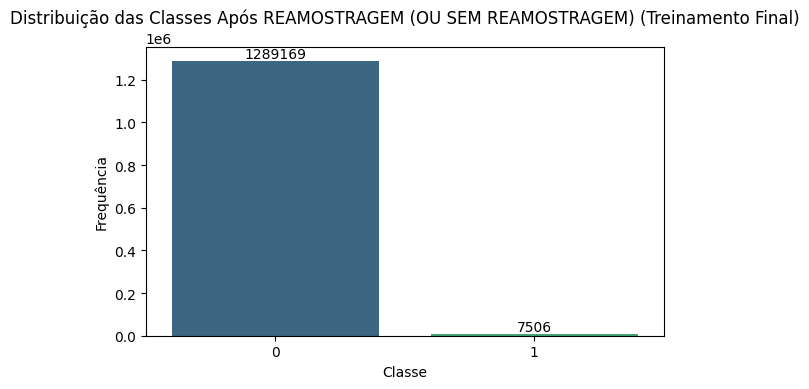

ROC AUC no conjunto de teste: 0.2766


In [55]:

# ===========================
# 5. Transforma o X_test com base no df_train completo
# ===========================

# ===========================
# 7. SMOTE - testando opcoes
# ===========================




def apply_encoding_and_scaling(df_train, df_test, target, smote_=None):
    df_test_transformed = df_test.copy()

    # Target Encoding
    df_test_transformed['bin_target_enc'] = apply_target_encoding(df_train, df_test_transformed, 'bin', target)

    # One Hot Encoding
    _, test_ohe_period, _ = fit_transform_ohe(df_train, df_test_transformed, 'period')
    X_test = pd.concat([df_test_transformed[['bin_target_enc']], test_ohe_period], axis=1)

    # Treina transforma√ß√£o no df_train completo
    df_train_transf = df_train.copy()
    df_train_transf['bin_target_enc'] = apply_target_encoding(df_train, df_train, 'bin', target)
    _, train_ohe_period, _ = fit_transform_ohe(df_train, df_train, 'period')
    X_train_transf = pd.concat([df_train_transf[['bin_target_enc']], train_ohe_period], axis=1)

    # === Cria flags ou aplica winsorization antes da escala ===
    X_train_transf = cria_flags_outliers(X_train_transf)
    X_test = cria_flags_outliers(X_test)  

    # Escala os dados com base no treino
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_transf)
    X_test_scaled = scaler.transform(X_test)

    y_train = df_train[target]

    # === Aplica SMOTE se for passado ===
    if smote_ is not None:
        X_train_scaled, y_train = smote_.fit_resample(X_train_scaled, y_train)

    return X_train_scaled, X_test_scaled, y_train



# ===========================
# 6. Transforma treino e teste
# ===========================


X_train_final, X_test_final, y_train_final = apply_encoding_and_scaling(df_train, X_test, target) #adicionar smote_ aqui caso queira reamostragem, e opcional porque e definido com valor na criacao def


#def de plotar 
def plot_class_distribution(y, title='Distribui√ß√£o das Classes'):
    # Converte para Series, caso ainda n√£o seja
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=y, palette='viridis')
    plt.title(title)
    plt.xlabel("Classe")
    plt.ylabel("Frequ√™ncia")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()


#chamador da def de plotar a proporcao das classes da target depois de smote
plot_class_distribution(y_train_final, title='Distribui√ß√£o das Classes Ap√≥s REAMOSTRAGEM (OU SEM REAMOSTRAGEM) (Treinamento Final)')


# ===========================
# 8. Treina o modelo final com os melhores par√¢metros do Optuna
# ===========================

neg, pos = np.bincount(y_train_final)
scale_pos_weight = neg / pos


model_final = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric=best_params['eval_metric'],
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist'  # ou 'hist' se n√£o for usar GPU
)

model_final.fit(X_train_final, y_train_final)

# ===========================
# 9. Gera a predi√ß√£o no treino
# ===========================
y_train_pred_proba = model_final.predict_proba(X_train_final)[:, 1]

# ===========================
# 10. Predi√ß√£o no conjunto de teste
# ===========================
y_test_pred_proba = model_final.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"ROC AUC no conjunto de teste: {roc_auc:.4f}")

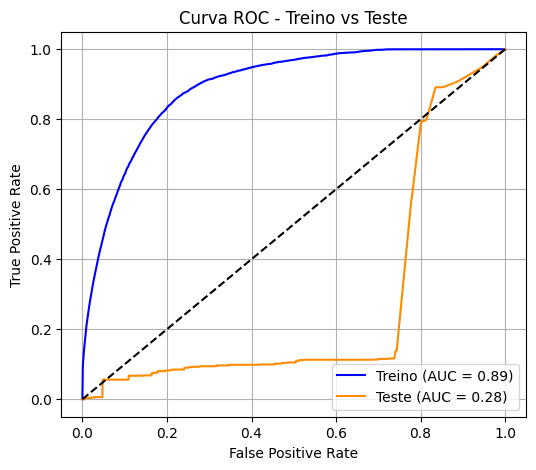

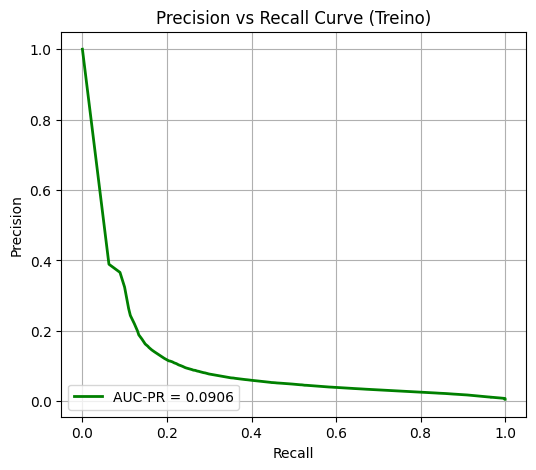

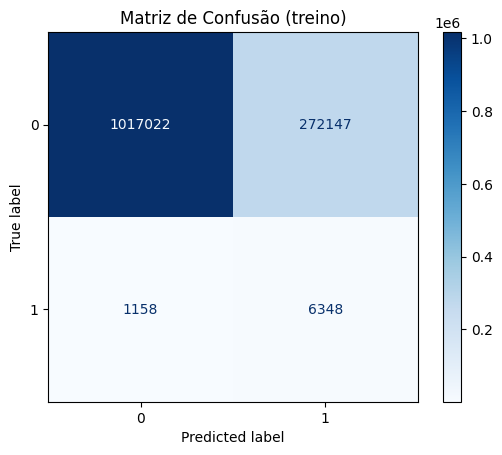

==== M√âTRICAS DE TESTE ====
Acur√°cia:    0.7892
Precis√£o:    0.0228
Recall:      0.8457
F1-score:    0.0444
ROC AUC:     0.2766
AUC-PR:      0.0906


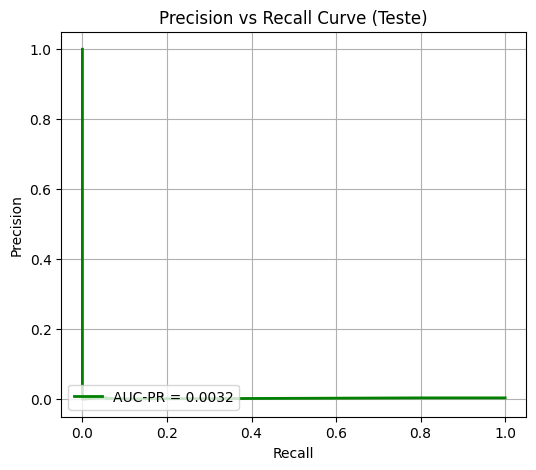

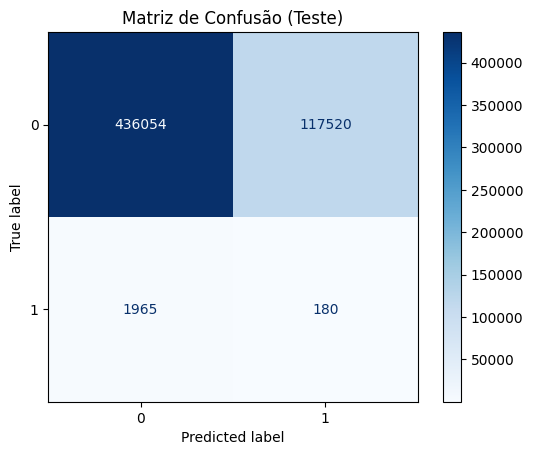

==== M√âTRICAS DE TESTE ====
Acur√°cia:    0.7850
Precis√£o:    0.0015
Recall:      0.0839
F1-score:    0.0030
ROC AUC:     0.2766
AUC-PR:      0.0032


In [56]:
def avaliar_modelo(y_train_true, y_train_proba, y_test_true, y_test_proba, threshold=threshold):
    """
    Avalia o desempenho de um modelo de classifica√ß√£o bin√°ria com curvas ROC e Precision-Recall.

    Par√¢metros:
        y_train_true (array-like): Valores reais do conjunto de treino.
        y_train_proba (array-like): Probabilidades previstas no treino.
        y_test_true (array-like): Valores reais do conjunto de teste.
        y_test_proba (array-like): Probabilidades previstas no teste.
        threshold (float): Limite para converter probabilidades em classes (default=0.5).
    """
    from sklearn.metrics import (
        roc_curve, roc_auc_score,
        precision_recall_curve,
        confusion_matrix, ConfusionMatrixDisplay,
        accuracy_score, precision_score, recall_score, f1_score
    )
    import matplotlib.pyplot as plt

    # ===== CURVA ROC - Treino e Teste =====
    fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_proba)
    auc_train = roc_auc_score(y_train_true, y_train_proba)
    auc_test = roc_auc_score(y_test_true, y_test_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_train, tpr_train, label=f"Treino (AUC = {auc_train:.2f})", color="blue")
    plt.plot(fpr_test, tpr_test, label=f"Teste (AUC = {auc_test:.2f})", color="darkorange")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Treino vs Teste")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()






    # ===== PRECISION vs RECALL =====
    precision, recall, thresholds = precision_recall_curve(y_train_true, y_train_proba)
    auc_pr = average_precision_score(y_train_true, y_train_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color="green", lw=2, label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall Curve (Treino)")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()


    # Predi√ß√£o bin√°ria com threshold
    y_train_pred = (y_train_proba >= threshold).astype(int)

     # ===== MATRIZ DE CONFUS√ÉO (treino) =====
    cm = confusion_matrix(y_train_true, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Matriz de Confus√£o (treino)")
    plt.show()

    
    # ===== M√âTRICAS BIN√ÅRIAS (Teste) =====
    accuracy = accuracy_score(y_train_true, y_train_pred)
    precision_val = precision_score(y_train_true, y_train_pred, zero_division=0)
    recall_val = recall_score(y_train_true, y_train_pred)
    f1 = f1_score(y_train_true, y_train_pred)
    auc_pr = average_precision_score(y_train_true, y_train_proba)  

    print("==== M√âTRICAS DE TESTE ====")
    print(f"Acur√°cia:    {accuracy:.4f}")
    print(f"Precis√£o:    {precision_val:.4f}")
    print(f"Recall:      {recall_val:.4f}")
    print(f"F1-score:    {f1:.4f}")
    print(f"ROC AUC:     {auc_test:.4f}")
    print(f"AUC-PR:      {auc_pr:.4f}")  






    # Predi√ß√£o bin√°ria com threshold
    y_test_pred = (y_test_proba >= threshold).astype(int)


    # ===== PRECISION vs RECALL =====
    precision, recall, thresholds = precision_recall_curve(y_test_true, y_test_proba)
    auc_pr = average_precision_score(y_test_true, y_test_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color="green", lw=2, label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall Curve (Teste)")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    # ===== MATRIZ DE CONFUS√ÉO (Teste) =====
    cm = confusion_matrix(y_test_true, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Matriz de Confus√£o (Teste)")
    plt.show()

    # ===== M√âTRICAS BIN√ÅRIAS (Teste) =====
    accuracy = accuracy_score(y_test_true, y_test_pred)
    precision_val = precision_score(y_test_true, y_test_pred, zero_division=0)
    recall_val = recall_score(y_test_true, y_test_pred)
    f1 = f1_score(y_test_true, y_test_pred)
    auc_pr = average_precision_score(y_test_true, y_test_proba)  

    print("==== M√âTRICAS DE TESTE ====")
    print(f"Acur√°cia:    {accuracy:.4f}")
    print(f"Precis√£o:    {precision_val:.4f}")
    print(f"Recall:      {recall_val:.4f}")
    print(f"F1-score:    {f1:.4f}")
    print(f"ROC AUC:     {auc_test:.4f}")
    print(f"AUC-PR:      {auc_pr:.4f}")  





#chamndo funcao de avaliar modelo com as metricas 

avaliar_modelo(y_train_final, y_train_pred_proba, y_test, y_test_pred_proba, threshold=threshold)


# TESTAR COM SELECAO DE FEATURES PELO MUTUAL IMPORTANCE

# EU MUDEI DE 20% DE TESTE PRA 30, PRA TESTAR SE O CONJUNTO DE TESTE COM MAIS DADOS E UNDERSAMPLING MELHORA 
# JA TENTEI TODOS OVERSAMPLING E NADA MELHOROU 